# Swarm Behaviour Prediction

In [1]:
# Модуль для добавления картинок в jupyter
from IPython.display import Image
# Seaborn - это библиотека визуализации данных Python, основанная на matplotlib. Она предоставляет высокоуровневый интерфейс 
# для рисования привлекательной и информативной статистической графики.
import seaborn as sns
# matplotlib.pyplot - это основанный на состоянии интерфейс для matplotlib. Он обеспечивает неявный, похожий на MATLAB, способ 
# построения графика. Он также открывает рисунки на вашем экране и действует как графический менеджер графического интерфейса.
import matplotlib.pyplot as plt
# Функция precision_score вычисляет точность: либо долю (по умолчанию), либо количество (normalize = False) правильных прогнозов.
# Функция classification_report строит текстовый отчет, показывающий основные показатели классификации.
# Функция confusion_matrix оценивает точность классификации путем вычисления матрицы путаницы с каждой строкой, соответствующей 
# истинному классу. (Своими словами: мы находим количество правильных и ошибочных классификаций для каждого класса)
# Функция plot_roc_curve строит ROC кривую.
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix,plot_roc_curve

In [2]:
# pandas — программная библиотека на языке Python для обработки и анализа данных. Работа pandas с данными строится поверх 
# библиотеки NumPy, являющейся инструментом более низкого уровня. Предоставляет специальные структуры данных и операции для 
# манипулирования числовыми таблицами и временны́ми рядами. 
import pandas as pd
# Считываем данные из файла
df=pd.read_csv('Swarm_Behaviour.csv')

# Data Preprocessing

In [3]:
# Выводим считанные данные
df

x1      y1  xVel1  yVel1   xA1   yA1  xS1  yS1   xC1   yC1  ...  \
0       562.05   -0.62 -10.70  -4.33  0.00  0.00  0.0  0.0  0.00  0.00  ...   
1       175.66  -57.09   2.31  -2.67  0.00  0.00  0.0  0.0  0.00  0.00  ...   
2       200.16 -320.07   4.01  -6.37  0.00  0.00  0.0  0.0  0.18 -0.26  ...   
3       316.99 -906.84   0.85   9.17 -0.17  1.03  0.0  0.0  0.00  0.00  ...   
4      1277.68  908.54  -2.02   8.23 -1.00  1.00  0.0  0.0  0.00  0.00  ...   
...        ...     ...    ...    ...   ...   ...  ...  ...   ...   ...  ...   
23304  -225.85  128.99  12.19  -7.56 -1.00  0.00  0.0  0.0  0.00  0.00  ...   
23305 -1352.02 -233.03  -0.86  -4.37 -0.07 -0.55  0.0  0.0  0.28  0.02  ...   
23306 -1360.61 -778.11  -2.89  -1.17  0.00  0.00  0.0  0.0  0.00  0.00  ...   
23307   987.11  615.69  -5.61  -2.92 -1.00 -1.00  0.0  0.0  0.00  0.00  ...   
23308   938.12 -924.87  11.18   2.85  0.10 -0.02  0.0  0.0  0.06  0.31  ...   

       yVel200  xA200  yA200  xS200  yS200  xC200  yC200  nAC200  nS200  \
0       -15.15   0.00   0.00   0.00   0.00   0.00   0.00      28      0   
1        -3.48   0.00   0.00   0.00   0.00   0.00   0.00       4      0   
2        -9.38   0.00   0.00   0.00   0.00  -0.11  -0.30      15      1   
3        10.39  -0.26   1.01   0.00   0.00   0.00   0.00      16      0   
4        13.91  -1.00   0.00   3.21  15.67   0.00   0.00      12      0   
...        ...    ...    ...    ...    ...    ...    ...     ...    ...   
23304    -5.06  -1.00  -1.00  -3.99   0.21   0.00   0.00      17      1   
23305   -12.41  -0.15  -0.70   0.00   0.00   0.02   0.07      69      1   
23306   -14.78   0.00   0.00   0.00   0.00   0.00   0.00      20      1   
23307     9.78  -1.00  -1.00   0.00   0.00   0.00   0.00      29      0   
23308    -2.90  -0.13  -0.29   1.31   0.38   0.00   0.00       2      1   

       Swarm_Behaviour  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  
...                ...  
23304              0.0  
23305              0.0  
23306              0.0  
23307              0.0  
23308              0.0  

[23309 rows x 2401 columns]

In [4]:
# Определяем уникальные значения в столбце "Swarm_Behaviour"
df["Swarm_Behaviour"].unique()

array([0., 1.])

In [5]:
# Выводим основную информацию о наборе данных (класс библиотеки, хранящей данные; количество строк и столбцов; типы данных;
# объем занимаемой памяти)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23309 entries, 0 to 23308
Columns: 2401 entries, x1 to Swarm_Behaviour
dtypes: float64(2001), int64(400)
memory usage: 427.0 MB


In [6]:
# Проверяем, что набор данных заполнен без пропусков (проверка путем суммирвоания количества пропущенных значений в наборе данных)
df.isna().sum()

x1                 0
y1                 0
xVel1              0
yVel1              0
xA1                0
                  ..
xC200              0
yC200              0
nAC200             0
nS200              0
Swarm_Behaviour    0
Length: 2401, dtype: int64

In [7]:
# describe() используются для просмотра некоторых основных статистических данных, таких как процентиль, среднее значение, 
# стандартное отклонение и т.д.
df.describe()

x1            y1         xVel1         yVel1           xA1  \
count  23309.000000  23309.000000  23309.000000  23309.000000  23309.000000   
mean     104.413631    -73.481853     -0.697607      0.061480     -0.147964   
std      843.200079    573.329374      6.427840      7.366739      0.376078   
min    -1414.140000  -1012.180000    -18.590000    -18.410000     -1.000000   
25%     -542.020000   -611.220000     -5.360000     -5.680000     -0.230000   
50%      145.300000   -157.350000     -0.450000     -1.540000      0.000000   
75%      896.200000    425.700000      3.940000      7.260000      0.000000   
max     1406.080000   1015.800000     18.470000     18.570000      1.000000   

                yA1           xS1           yS1           xC1           yC1  \
count  23309.000000  23309.000000  23309.000000  23309.000000  23309.000000   
mean       0.152034     -1.055732     -0.731546     -0.034915      0.077123   
std        0.588582     26.388570     20.684183      0.559690      0.628478   
min       -1.000000   -944.070000   -847.910000     -2.680000     -2.680000   
25%       -0.010000      0.000000      0.000000     -0.040000     -0.020000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.940000      0.000000      0.000000      0.000000      0.020000   
max        1.040000     68.560000    234.740000      2.680000      2.680000   

       ...       yVel200         xA200         yA200         xS200  \
count  ...  23309.000000  23309.000000  23309.000000  23309.000000   
mean   ...      0.086824     -0.126276      0.127497     -1.526260   
std    ...      7.683539      0.378830      0.570589     73.903764   
min    ...    -18.440000     -1.040000     -1.000000  -4079.230000   
25%    ...     -5.600000     -0.190000      0.000000      0.000000   
50%    ...     -0.780000      0.000000      0.000000      0.000000   
75%    ...      7.480000      0.000000      0.540000      0.000000   
max    ...     18.490000      1.000000      1.040000    255.990000   

              yS200         xC200         yC200        nAC200         nS200  \
count  23309.000000  23309.000000  23309.000000  23309.000000  23309.000000   
mean      -0.118891     -0.012388      0.085076     26.433995      2.130679   
std        7.002853      0.555143      0.614603     34.136098      7.431911   
min     -370.240000     -2.680000     -2.680000      0.000000      0.000000   
25%        0.000000     -0.070000      0.000000      2.000000      0.000000   
50%        0.000000      0.000000      0.000000     12.000000      0.000000   
75%        0.000000      0.000000      0.030000     35.000000      1.000000   
max       57.840000      2.680000      2.680000    142.000000     64.000000   

       Swarm_Behaviour  
count     23309.000000  
mean          0.341242  
std           0.474136  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           1.000000  
max           1.000000  

[8 rows x 2401 columns]

C:\Users\ripra\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Swarm_Behaviour', ylabel='count'>

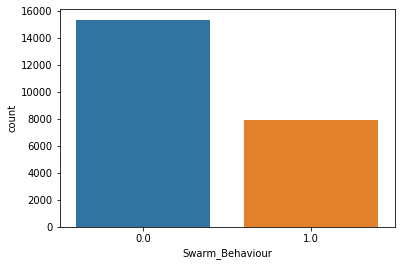

In [8]:
# Определяем количество значений для каждого из классов "Swarm_Behaviour" и выражаем через диаграмму.
sns.countplot(df["Swarm_Behaviour"])

Как видно из гистограммы, количество значений "0" примерно в 2 раза больше, чем "1" в столбце "Swarm_Behaviour"

In [9]:
# value_counts() возвращает количество конкретных значений в наборе, shape возвращает общее количество элементов. При делении 
# получаем процентное значение конкретных значений в наборе. Как видим, 65.87% значений "0" и 34.12 значений "1". Это аналогично 
# графику выше, но представлено в процентном соотношении.
df["Swarm_Behaviour"].value_counts()/df.shape[0]

0.0    0.658758
1.0    0.341242
Name: Swarm_Behaviour, dtype: float64

# Dimensionality Technique (PCA)

In [10]:
# NumPy это open-source модуль для python, который предоставляет общие математические и числовые операции в виде 
# пре-скомпилированных, быстрых функций. Они объединяются в высокоуровневые пакеты. Они обеспечивают функционал, который можно 
# сравнить с функционалом MatLab.
import numpy as np
# PCA используется для разложения многомерного набора данных на набор последовательных ортогональных компонентов, которые 
# объясняют максимальную величину дисперсии. В scikit-learn PCA реализован как объект-преобразователь, который изучает 
# компоненты в своем методе подгонки и может использоваться с новыми данными для проецирования их на эти компоненты.
# Если говорить простым языком, то метод позволяет найти зависимые последовательности и объединить их в одну при минимальной 
# потере информации.
from sklearn.decomposition import PCA
# StandardScaler стандартизирует функции, удалив среднее значение и масштабируя до единичной дисперсии.
from sklearn.preprocessing import StandardScaler
# Создаем объект StandardScaler()
scaler=StandardScaler()
# Создаем новый набор данных, в котором удалили столбец "Swarm_Behaviour"
X=df.drop("Swarm_Behaviour",axis=1)
# Применяем функцию к данным. Тем самым стандартизируя данные.
X=scaler.fit_transform(X)
X

array([[ 0.54274922,  0.12708823, -1.55613842, ..., -0.13842753,
         0.04587631, -0.28669944],
       [ 0.08449702,  0.02859125,  0.46791321, ..., -0.13842753,
        -0.65720683, -0.28669944],
       [ 0.11355362, -0.4301078 ,  0.73239344, ..., -0.62655795,
        -0.33496039, -0.15214167],
       ...,
       [-1.73749398, -1.22903743, -0.34108514, ..., -0.13842753,
        -0.18848474, -0.15214167],
       [ 1.0468634 ,  1.20207802, -0.7642535 , ..., -0.13842753,
         0.07517144, -0.28669944],
       [ 0.98876207, -1.48502144,  1.84787769, ..., -0.13842753,
        -0.71579709, -0.15214167]])

* We scale for the PCA and future models

In [11]:
# Transformers являются одними из самых фундаментальных типов объектов в sklearn, которые реализуют три конкретных метода, а 
# именно fit (), transform () и fit_transform ().
# В transformers scikit-learn метод fit () используется для подгонки Transformer(преобразователя/набора преобразований) к 
# входным данным и выполнения необходимых вычислений для конкретного применяемого нами Transformer.
variance=[]
p=[50,100,150,200,300,400,500,600,700,800,900,1000,1100,1300,1500,1700,1900,2000]
for p in p:
    pca_model=PCA(n_components=p)
    pca_model.fit(X)
    # explained_variance_ratio_ возвращает дисперсию, вызванную каждым из основных компонентов(т.е. массив дисперсий). Необходимо
    # найти минимальное количество компонентов (столбцов), при которых дисперсия будет хорошо улавливаться. Numpy.sum вычисляет 
    # сумму всех дисперсий при определенном количестве компонентов.
    variance.append(np.sum(pca_model.explained_variance_ratio_))

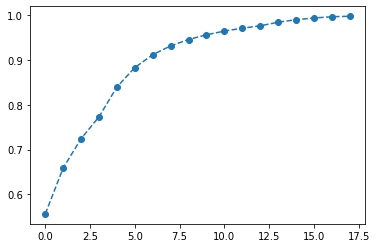

In [12]:
# Построим график из полученного списка сумм дисперсий по разному количеству компонентов.
import matplotlib.pyplot as plt
plt.plot(variance,"o--")

* We se that at 400-500 components the variance of the data is catched very well

In [13]:
# Определив по графику, что при 400-500 компонентах дисперсия улавливается хорошо, то построим модель на 400 компонентах.
pca_model=PCA(n_components=400)
pca_model.fit(X)

PCA(n_components=400)

In [14]:
np.sum(pca_model.explained_variance_ratio_)

0.8832212575355631

* At 400 components is okay, we have the 90% of the variance. So we reduce from 2401 to 400. Thats almost the 17% of the data (Dimensionally speaking)

In [15]:
features=pca_model.transform(X)

In [16]:
features

array([[-10.79425098,  -0.10470273, -10.59618843, ...,   0.58823282,
         -0.56292965,  -1.16153271],
       [ -0.77735445,  -4.39276533,  -7.40303112, ...,  -1.36745685,
          0.33301714,   0.44532295],
       [ -4.02338516,  -5.84605964, -11.41879431, ...,   0.10966451,
         -0.2368429 ,   0.02567278],
       ...,
       [-11.36806075,   0.05604528, -10.78260178, ...,  -0.09102946,
         -0.60081578,   1.06936828],
       [-24.98493797, -19.90733634,  15.15735245, ...,   2.98405068,
         -1.10643232,   0.33990149],
       [ -2.67435753,  -7.0530078 ,  -8.66911857, ...,  -0.9217564 ,
          0.0678142 ,  -0.23550219]])

In [17]:
X=features
y=df["Swarm_Behaviour"]

In [18]:
#Таким образом мы получили набор данных, сокращенный до 17% от изначального при минимальной потере информации.

# Models Creation

In [19]:
# train_test_split разделяет набор данных на тестовые и обучающие.
# GridSearchCV – это очень мощный инструмент для автоматического подбирания параметров для моделей машинного обучения. 
# GridSearchCV находит наилучшие параметры, путем обычного перебора: он создает модель для каждой возможной комбинации 
# параметров.GridSearchCV реализует методы «fit» и «score».Точность классификации – это то, что имеют в виду по умолчанию, когда
# используют термин «score». Это отношение правильно спрогнозированных "Наблюдений" (Observation) к общему их количеству.
from sklearn.model_selection import train_test_split,GridSearchCV

In [20]:
#Разделяем набор данных на обучающий и тестовый
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)

## Logistic Regression

In [21]:
# Обучение методом Logistic Regression.
# Основная идея логистической регрессии заключается в том, что пространство исходных значений может быть разделено линейной 
# границей (т.е. прямой) на две соответствующих классам области. Итак, что же имеется ввиду под линейной границей? В случае двух
# измерений — это просто прямая линия без изгибов. В случае трех — плоскость, и так далее.
display(Image(url='https://habrastorage.org/r/w1560/getpro/habr/post_images/555/369/344/5553693449d97a6ccb730f4760a2eacd.png', width = 300))

In [22]:
# Создадим объект модели Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=101,max_iter=10000)
# Создаем сетку параметров paramgrid, которые будут проверены в процессе обучения.
# Параметры:
# 'l2': add a L2 penalty term and it is the default choice;
# 'l1': add a L1 penalty term;
# 'elasticnet': both L1 and L2 penalty terms are added.
penalty=["l1","l2","elasticnet"]
l1_ratio=[0.01,0.1,0.5,1]
C= [0.01,0.1,1]
paramgrid={
           "penalty":penalty,
           "l1_ratio":l1_ratio,
           "C":C}

In [23]:
# Игнорируем предупреждения
import warnings
warnings.filterwarnings("ignore")
# При помощи GridSearchCV выполняем перебор всех сочетаний параметров.
grid_model=GridSearchCV(lr,paramgrid,return_train_score=True,verbose=2)
# Запускаем подбор лучших сочетаний параметров при помощи GridSearchCV.fit, и передаем train данные.
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ..................C=0.01, l1_ratio=0.01, penalty=l1; total time=   0.0s
[CV] END ..................C=0.01, l1_ratio=0.01, penalty=l1; total time=   0.0s
[CV] END ..................C=0.01, l1_ratio=0.01, penalty=l1; total time=   0.0s
[CV] END ..................C=0.01, l1_ratio=0.01, penalty=l1; total time=   0.0s
[CV] END ..................C=0.01, l1_ratio=0.01, penalty=l1; total time=   0.0s
[CV] END ..................C=0.01, l1_ratio=0.01, penalty=l2; total time=   1.7s
[CV] END ..................C=0.01, l1_ratio=0.01, penalty=l2; total time=   1.6s
[CV] END ..................C=0.01, l1_ratio=0.01, penalty=l2; total time=   1.6s
[CV] END ..................C=0.01, l1_ratio=0.01, penalty=l2; total time=   1.5s
[CV] END ..................C=0.01, l1_ratio=0.01, penalty=l2; total time=   1.7s
[CV] END ..........C=0.01, l1_ratio=0.01, penalty=elasticnet; total time=   0.0s
[CV] END ..........C=0.01, l1_ratio=0.01, penal

[CV] END ......................C=0.1, l1_ratio=1, penalty=l1; total time=   0.0s
[CV] END ......................C=0.1, l1_ratio=1, penalty=l1; total time=   0.0s
[CV] END ......................C=0.1, l1_ratio=1, penalty=l1; total time=   0.0s
[CV] END ......................C=0.1, l1_ratio=1, penalty=l1; total time=   0.0s
[CV] END ......................C=0.1, l1_ratio=1, penalty=l2; total time=   4.0s
[CV] END ......................C=0.1, l1_ratio=1, penalty=l2; total time=   3.8s
[CV] END ......................C=0.1, l1_ratio=1, penalty=l2; total time=   3.0s
[CV] END ......................C=0.1, l1_ratio=1, penalty=l2; total time=   3.0s
[CV] END ......................C=0.1, l1_ratio=1, penalty=l2; total time=   3.7s
[CV] END ..............C=0.1, l1_ratio=1, penalty=elasticnet; total time=   0.0s
[CV] END ..............C=0.1, l1_ratio=1, penalty=elasticnet; total time=   0.0s
[CV] END ..............C=0.1, l1_ratio=1, penalty=elasticnet; total time=   0.0s
[CV] END ..............C=0.1

GridSearchCV(estimator=LogisticRegression(max_iter=10000, random_state=101),
             param_grid={'C': [0.01, 0.1, 1], 'l1_ratio': [0.01, 0.1, 0.5, 1],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             return_train_score=True, verbose=2)

In [24]:
# Рассмотрим основные результаты подбора параметров
cv_results=pd.DataFrame(grid_model.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.015484      0.000756         0.000000        0.000000    0.01   
1       1.708324      0.074420         0.002033        0.001684    0.01   
2       0.017187      0.003124         0.000000        0.000000    0.01   
3       0.016117      0.000980         0.000000        0.000000    0.01   
4       1.759273      0.139647         0.003152        0.000285    0.01   

  param_l1_ratio param_penalty  \
0           0.01            l1   
1           0.01            l2   
2           0.01    elasticnet   
3            0.1            l1   
4            0.1            l2   

                                              params  split0_test_score  \
0     {'C': 0.01, 'l1_ratio': 0.01, 'penalty': 'l1'}                NaN   
1     {'C': 0.01, 'l1_ratio': 0.01, 'penalty': 'l2'}           0.899056   
2  {'C': 0.01, 'l1_ratio': 0.01, 'penalty': 'elas...                NaN   
3      {'C': 0.01, 'l1_ratio': 0.1, 'penalty': 'l1'}                NaN   
4      {'C': 0.01, 'l1_ratio': 0.1, 'penalty': 'l2'}           0.899056   

   split1_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0                NaN  ...              NaN             NaN               21   
1           0.893593  ...         0.899949         0.00501                1   
2                NaN  ...              NaN             NaN               34   
3                NaN  ...              NaN             NaN               33   
4           0.893593  ...         0.899949         0.00501                1   

   split0_train_score  split1_train_score  split2_train_score  \
0                 NaN                 NaN                 NaN   
1            0.923269            0.923704            0.918842   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4            0.923269            0.923704            0.918842   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0                 NaN                 NaN               NaN              NaN  
1            0.921344            0.920558          0.921543         0.001787  
2                 NaN                 NaN               NaN              NaN  
3                 NaN                 NaN               NaN              NaN  
4            0.921344            0.920558          0.921543         0.001787  

[5 rows x 23 columns]

Text(0, 0.5, 'Score')

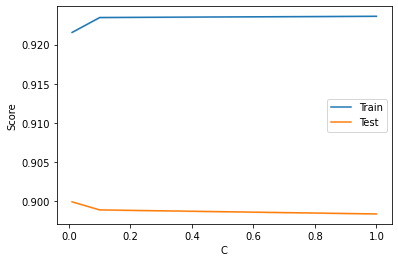

In [25]:
# Построим график зависимости параметра mean_train_score от param_C для обучающих и тестовых данных модели GridSearchCV.
sns.lineplot(data=cv_results,x="param_C",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_C",y="mean_test_score",label="Test")
plt.xlabel("C")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

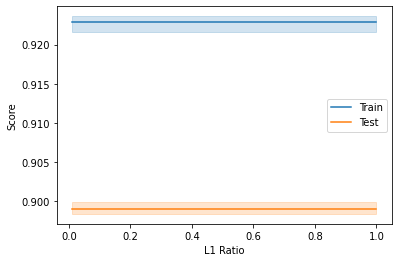

In [26]:
# Построим график зависимости параметра mean_score от param_l1_ratio для обучающих и тестовых данных модели Logistic Regression.
sns.lineplot(data=cv_results,x="param_l1_ratio",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_l1_ratio",y="mean_test_score",label="Test")
plt.xlabel("L1 Ratio")
plt.ylabel("Score")

In [27]:
# Найдем лучшее сочетание параметров при помощи GridSearchCV.best_params_
grid_model.best_params_

{'C': 0.01, 'l1_ratio': 0.01, 'penalty': 'l2'}

In [28]:
# Создадим и обучим модель на лучшем сочетании параметров и тренировочных данных X_train, y_train.
lr=LogisticRegression(C=0.01,l1_ratio=0.01,penalty="l2",random_state=101,max_iter=10000)
lr.fit(X_train,y_train)   

LogisticRegression(C=0.01, l1_ratio=0.01, max_iter=10000, random_state=101)

In [29]:
# Выполним проверку модели на данных X_test и X_train (т.е. "предскажем" при помощи .predict)
y_pred=lr.predict(X_test)
y_pred2=lr.predict(X_train)

In [30]:
# Определим долю правильных "предсказаний" по отношению ко всем предсказаниям при помощи accuracy_score.
acc_lr=accuracy_score(y_test,y_pred)
print("Train: ",accuracy_score(y_train,y_pred2))
print("Test: ",accuracy_score(y_test,y_pred))
# Как мы видим, для обучающих данных доля правильных предсказаний 91.77%, а для тестовых 89.57%.

Train:  0.9187689491447858
Test:  0.8965339739190117


In [31]:
#Также определим другие метрики качества работы модели при помощи classification_report
# precision показывает отношение решений True Positive/(True Positive + False Positive)
# recall показывает отношение решений True Positive/(True Positive + False Negative)
# f1-score = 2 * (precision * recall) / (precision + recall)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92      3808
         1.0       0.86      0.83      0.85      2020

    accuracy                           0.90      5828
   macro avg       0.89      0.88      0.88      5828
weighted avg       0.90      0.90      0.90      5828



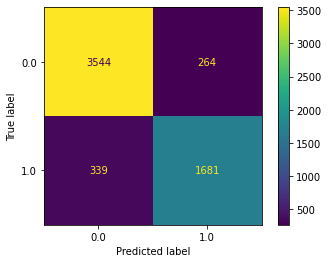

In [32]:
# При помощи plot_confusion_matrix построим график confusion matrix (Матрицы путаницы), чтобы наглядно представить количество 
# всех сочетаний предсказанных и истинных значений.
plot_confusion_matrix(lr,X_test,y_test);

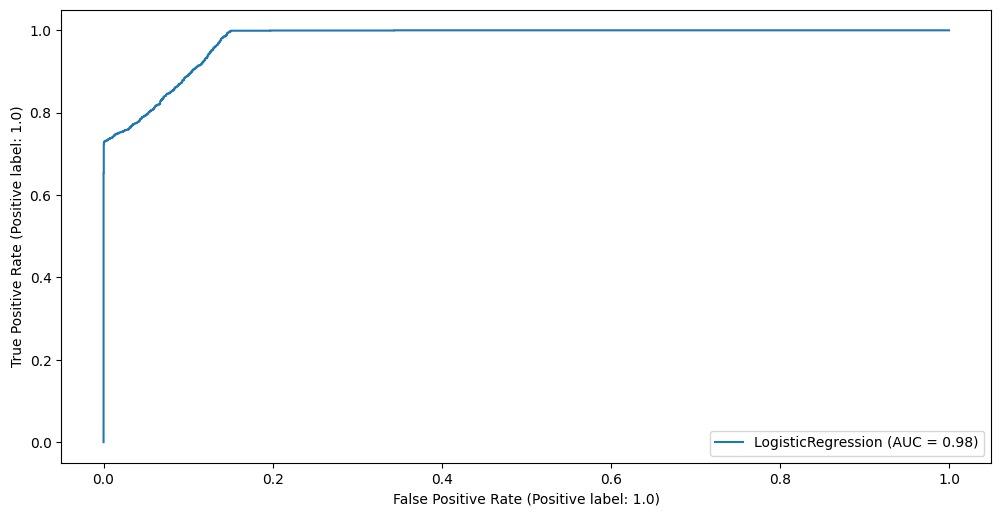

In [33]:
# Построит ROC кривую, при помощи которой мы сможем оценить кацество модели не привязываясь к каким-то пороговым значениям.
# Площадь под кривой в данном случае показывает качество алгоритма (больше — лучше), кроме этого, важной является крутизна самой
# кривой — мы хотим максимизировать TPR, минимизируя FPR, а значит, наша кривая в идеале должна стремиться к точке (0,1).
fig,ax=plt.subplots(figsize=(12,6),dpi=100)
plot_roc_curve(lr,X_test,y_test,ax=ax);

## K Nearest Neighbors

In [34]:
# Метод k-ближайших соседей (k-nearest neighbors) — метрический алгоритм для автоматической классификации объектов или регрессии.
# В случае использования метода для классификации объект присваивается тому классу, который является наиболее распространённым 
# среди k соседей данного элемента, классы которых уже известны. В случае использования метода для регрессии, объекту 
# присваивается среднее значение по k ближайшим к нему объектам, значения которых уже известны.
# Для того, чтобы было интуитивно понятно, давайте рассмотрим пример:
display(Image(url='https://media.proglib.io/posts/2021/07/01/49f41199784f0942aa2019a89a97fd80.png', width = 300))

In [35]:
# У нас есть тестовый образец в виде зеленого круга. Синие квадраты мы обозначим как класс 1, красные треугольники – класс 2.
# Зеленый круг должен быть классифицирован как класс 1 или класс 2. Если рассматриваемая нами область является малым кругом, то 
# объект классифицируется как 2-й класс, потому что внутри данного круга 2 треугольника и только 1 квадрат.
# Если мы рассматриваем большой круг (с пунктиром), то круг будет классифицирован как 1-й класс, так как внутри круга 3 квадрата 
# в противовес 2 треугольникам.

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
# n_neighbors - количество "соседей", по которым будет производиться классификация.
# Создадим набор моделей с разным количеством соседей (от 1 до 14 включая), каждую модель обучим на данных X_train,y_train.
# "Предскажем" значения для данных X_test в каждой модели. Создадим список из метрик accuracy_score для каждой модели.
acc=[]
for n in range(1,15):
    KNC=KNeighborsClassifier(n_neighbors=n)
    KNC.fit(X_train,y_train)
    y_pred= KNC.predict(X_test)
    acc.append(accuracy_score(y_test,y_pred))



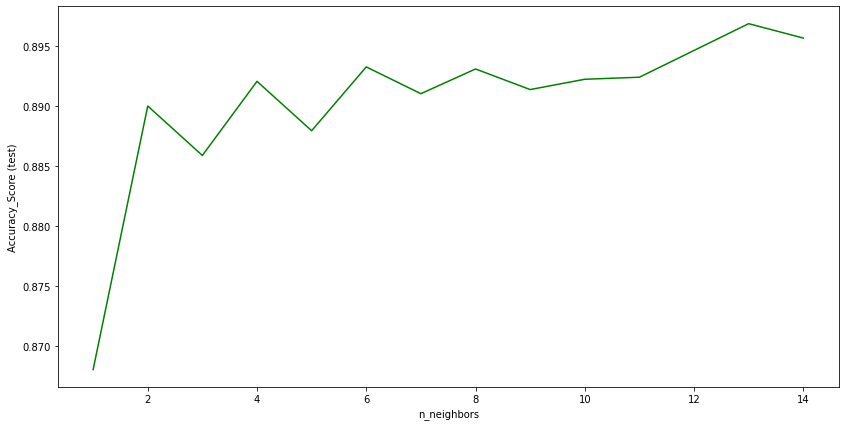

In [38]:
# Построим график зависимости метрики качества модели (собранных выше) от количества выбранных соседей.
plt.figure(figsize=(14,7))
sns.lineplot(x=np.arange(1,15),y=acc,color="green")
plt.ylabel("Accuracy_Score (test)")
plt.xlabel("n_neighbors");

In [39]:
# Как видно из графика, оптимальным количеством рассматриваемых соседей будет 6. Поэтому создадим модель, указав оптимальное 
# количество соседей и обучим ее на данных X_train,y_train.
KNC=KNeighborsClassifier(n_neighbors=6)
KNC.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=6)

In [40]:
# Выполним проверку модели на данных X_test и X_train (т.е. "предскажем" при помощи .predict) 
y_pred=KNC.predict(X_test)
y_pred2=KNC.predict(X_train)

In [41]:
# Определим долю правильных "предсказаний" по отношению ко всем предсказаниям при помощи accuracy_score.
acc_KNC=accuracy_score(y_test,y_pred)
print("Train: ",accuracy_score(y_train,y_pred2))
print("Test: ",accuracy_score(y_test,y_pred))
# Как мы видим, для обучающих данных доля правильных предсказаний 92.73%, а для тестовых 89.36%.

Train:  0.9279789485727361
Test:  0.893273850377488


In [42]:
#Также определим другие метрики качества работы модели при помощи classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92      3808
         1.0       0.89      0.79      0.84      2020

    accuracy                           0.89      5828
   macro avg       0.89      0.87      0.88      5828
weighted avg       0.89      0.89      0.89      5828



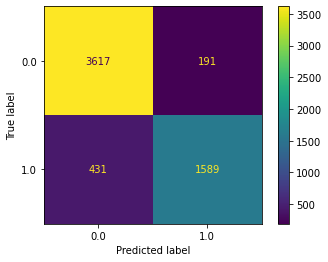

In [43]:
# При помощи plot_confusion_matrix построим график confusion matrix (Матрицы путаницы), чтобы наглядно представить количество 
# всех сочетаний предсказанных и истинных значений.
plot_confusion_matrix(KNC,X_test,y_test);

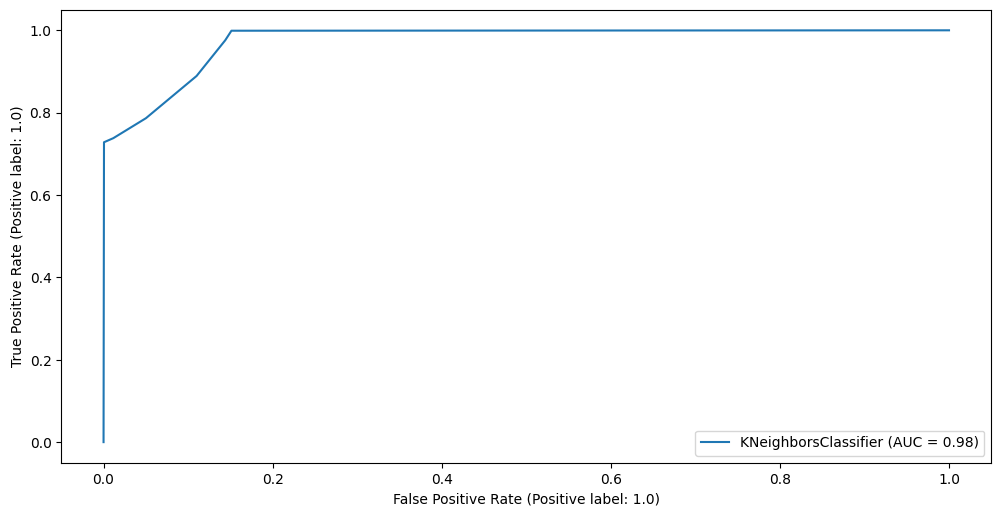

In [44]:
# Построит ROC кривую
fig,ax=plt.subplots(figsize=(12,6),dpi=100)
plot_roc_curve(KNC,X_test,y_test,ax=ax);

## Ridge Classifier

In [45]:
# В ридж-регрессии, также называемой L2-регрессией, штраф — это сумма квадратов коэффициентов переменных. Коэффициенты линейной 
# регрессии — просто числа, которые прикреплены к каждой независимой переменной и определяют влияние этой переменной на 
# результирующую переменную. Иногда их называют весами. В ридж-регрессии штрафы уменьшают коэффициенты при соответствующих 
# независимых переменных, но никогда не обнуляют их. Это значит, что шумы всегда будут влиять на результат, но в очень маленькой
# степени.
from sklearn.linear_model import RidgeClassifier

In [46]:
# Создаем объект модели машинного обучения
RC=RidgeClassifier(random_state=101)
# Для тестирования модели с различными параметрами создаем список.
params={"alpha":[0.0001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,10]}
# При помощи GridSearchCV выполняем перебор всех сочетаний параметров.
grid_model=GridSearchCV(RC,params,return_train_score=True,verbose=2)
# Запускаем подбор лучших сочетаний параметров при помощи GridSearchCV.fit, и передаем train данные.
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.1s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.05; total time=   0.0s
[CV] END .......................................

GridSearchCV(estimator=RidgeClassifier(random_state=101),
             param_grid={'alpha': [0.0001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   10]},
             return_train_score=True, verbose=2)

In [47]:
# Рассмотрим основные результаты подбора параметров.
cv_results=pd.DataFrame(grid_model.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.128199      0.005232         0.003601        0.000489      0.0001   
1       0.131810      0.011161         0.003592        0.000483        0.01   
2       0.127200      0.005706         0.003602        0.000490        0.05   
3       0.120001      0.001266         0.003800        0.000400         0.1   
4       0.119401      0.001855         0.003401        0.000489         0.2   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.903918           0.895309           0.908467   
1    {'alpha': 0.01}           0.903918           0.895309           0.908467   
2    {'alpha': 0.05}           0.903918           0.895309           0.908467   
3     {'alpha': 0.1}           0.903918           0.895309           0.908467   
4     {'alpha': 0.2}           0.903918           0.895309           0.908467   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.897025  ...         0.901207         0.00474                1   
1           0.897025  ...         0.901207         0.00474                1   
2           0.897025  ...         0.901207         0.00474                1   
3           0.897025  ...         0.901207         0.00474                1   
4           0.897025  ...         0.901207         0.00474                1   

   split0_train_score  split1_train_score  split2_train_score  \
0             0.92091            0.921916            0.918055   
1             0.92091            0.921916            0.918055   
2             0.92091            0.921916            0.918055   
3             0.92091            0.921916            0.918055   
4             0.92091            0.921916            0.918055   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.919771            0.918985          0.919927         0.001367  
1            0.919771            0.918985          0.919927         0.001367  
2            0.919771            0.918985          0.919927         0.001367  
3            0.919771            0.918985          0.919927         0.001367  
4            0.919771            0.918985          0.919927         0.001367  

[5 rows x 21 columns]

Text(0, 0.5, 'Score')

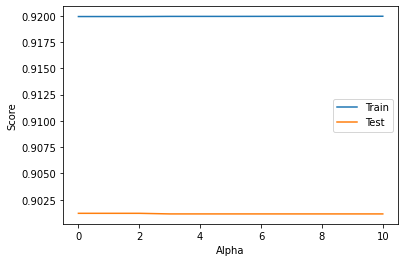

In [48]:
# Построим график зависимости параметра mean_score от param_alpha для обучающих и тестовых данных модели Ridge Classifier.
sns.lineplot(data=cv_results,x="param_alpha",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_alpha",y="mean_test_score",label="Test")
plt.xlabel("Alpha")
plt.ylabel("Score")

In [49]:
# Определим лучшие параметры для модели Ridge Classifier при помощи best_params_
grid_model.best_params_

{'alpha': 0.0001}

In [50]:
# Создадим модель Ridge Classifier с лучшими параметрами и обучим ее на train данных.
RC=RidgeClassifier(alpha=0.0001,random_state=101)
RC.fit(X_train,y_train)

RidgeClassifier(alpha=0.0001, random_state=101)

In [51]:
# Выполним "предсказание" на обученной модели для test и train данных
y_pred=RC.predict(X_test)
y_pred2=RC.predict(X_train)

In [52]:
# Определим долю правильных "предсказаний" по отношению ко всем предсказаниям при помощи accuracy_score.
acc_RC=accuracy_score(y_test,y_pred)
print("Train: ",accuracy_score(y_train,y_pred2))
print("Test: ",accuracy_score(y_test,y_pred))
# Как мы видим, для обучающих данных доля правильных предсказаний 91.81%, а для тестовых 89.67%.

Train:  0.9175676448715748
Test:  0.898936170212766


In [53]:
# Рассмотрим другие метрики качества модели
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.93      0.92      3808
         1.0       0.87      0.84      0.85      2020

    accuracy                           0.90      5828
   macro avg       0.89      0.88      0.89      5828
weighted avg       0.90      0.90      0.90      5828



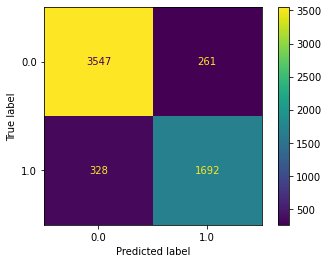

In [54]:
# Для наглядности построим график confusion matrix.
plot_confusion_matrix(RC,X_test,y_test);

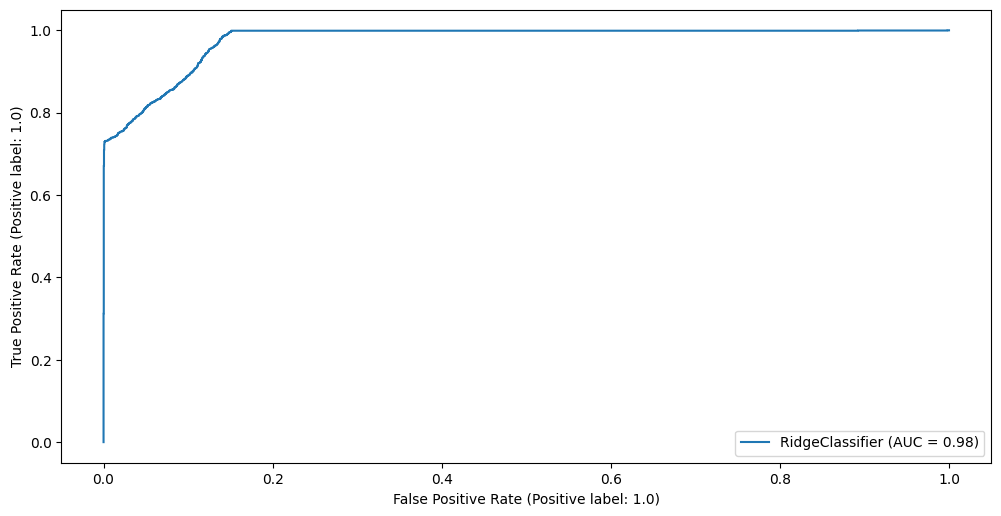

In [55]:
# Построим ROC кривую для рассматриваемой модели
fig,ax=plt.subplots(figsize=(12,6),dpi=100)
plot_roc_curve(RC,X_test,y_test,ax=ax);

## Support Vector Classifier

In [56]:
# Метод опорных векторов.
display(Image(url='https://staesthetic.files.wordpress.com/2014/02/svm.png?w=1060', width = 300))
# Говоря простым языком: он ищет, как так провести две прямые между категориями, чтобы между ними образовался наибольший зазор.
from sklearn.svm import SVC

In [57]:
# Создаем набор параметров, чтобы подобрать наилучшие для модели Support Vector Classifier
params={"C":[0.01,0.1],
    "kernel":["linear"],
    "degree":[1,2,3],
    "gamma":["scale","auto"],}
# Создаем объект модели
svc=SVC(random_state=101)

In [58]:
# При помощи GridSearchCV выполняем перебор всех сочетаний параметров.
grid_model=GridSearchCV(svc,params,return_train_score=True,verbose=2)
# Запускаем подбор лучших сочетаний параметров при помощи GridSearchCV.fit, и передаем train данные.
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .......C=0.01, degree=1, gamma=scale, kernel=linear; total time=  14.0s
[CV] END .......C=0.01, degree=1, gamma=scale, kernel=linear; total time=  14.2s
[CV] END .......C=0.01, degree=1, gamma=scale, kernel=linear; total time=  14.8s
[CV] END .......C=0.01, degree=1, gamma=scale, kernel=linear; total time=  14.5s
[CV] END .......C=0.01, degree=1, gamma=scale, kernel=linear; total time=  14.9s
[CV] END ........C=0.01, degree=1, gamma=auto, kernel=linear; total time=  15.5s
[CV] END ........C=0.01, degree=1, gamma=auto, kernel=linear; total time=  15.6s
[CV] END ........C=0.01, degree=1, gamma=auto, kernel=linear; total time=  17.5s
[CV] END ........C=0.01, degree=1, gamma=auto, kernel=linear; total time=  16.2s
[CV] END ........C=0.01, degree=1, gamma=auto, kernel=linear; total time=  16.8s
[CV] END .......C=0.01, degree=2, gamma=scale, kernel=linear; total time=  17.1s
[CV] END .......C=0.01, degree=2, gamma=scale, k

GridSearchCV(estimator=SVC(random_state=101),
             param_grid={'C': [0.01, 0.1], 'degree': [1, 2, 3],
                         'gamma': ['scale', 'auto'], 'kernel': ['linear']},
             return_train_score=True, verbose=2)

In [59]:
# Рассмотрим основные результаты подбора параметров.
cv_results=pd.DataFrame(grid_model.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0      12.555786      0.427288         2.019969        0.076624    0.01   
1      14.121968      0.733235         2.289902        0.302673    0.01   
2      13.094878      0.988802         1.962217        0.114733    0.01   
3      12.460410      0.226254         1.910809        0.047863    0.01   
4      13.268747      0.700068         1.952211        0.181969    0.01   

  param_degree param_gamma param_kernel  \
0            1       scale       linear   
1            1        auto       linear   
2            2       scale       linear   
3            2        auto       linear   
4            3       scale       linear   

                                              params  split0_test_score  ...  \
0  {'C': 0.01, 'degree': 1, 'gamma': 'scale', 'ke...           0.897055  ...   
1  {'C': 0.01, 'degree': 1, 'gamma': 'auto', 'ker...           0.897055  ...   
2  {'C': 0.01, 'degree': 2, 'gamma': 'scale', 'ke...           0.897055  ...   
3  {'C': 0.01, 'degree': 2, 'gamma': 'auto', 'ker...           0.897055  ...   
4  {'C': 0.01, 'degree': 3, 'gamma': 'scale', 'ke...           0.897055  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.897031        0.005795                1            0.926702   
1         0.897031        0.005795                1            0.926702   
2         0.897031        0.005795                1            0.926702   
3         0.897031        0.005795                1            0.926702   
4         0.897031        0.005795                1            0.926702   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.928423            0.922846            0.924634   
1            0.928423            0.922846            0.924634   
2            0.928423            0.922846            0.924634   
3            0.928423            0.922846            0.924634   
4            0.928423            0.922846            0.924634   

   split4_train_score  mean_train_score  std_train_score  
0            0.925492          0.925619         0.001882  
1            0.925492          0.925619         0.001882  
2            0.925492          0.925619         0.001882  
3            0.925492          0.925619         0.001882  
4            0.925492          0.925619         0.001882  

[5 rows x 24 columns]

Text(0, 0.5, 'Score')

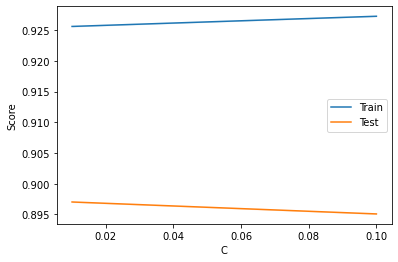

In [60]:
# Построим график зависимости параметра mean_score от param_C для обучающих и тестовых данных модели Support Vector Classifier
sns.lineplot(data=cv_results,x="param_C",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_C",y="mean_test_score",label="Test")
plt.xlabel("C")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

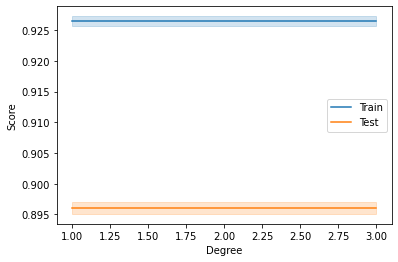

In [61]:
# Построим график зависимости параметра mean_score от param_degree для обучающих и тестовых данных модели Support Vector Classifier
sns.lineplot(data=cv_results,x="param_degree",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_degree",y="mean_test_score",label="Test")
plt.xlabel("Degree")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

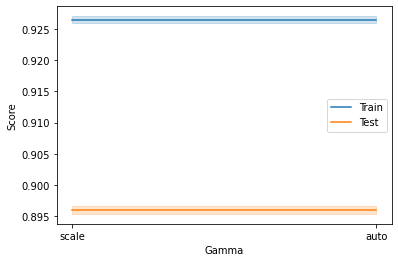

In [62]:
# Построим график зависимости параметра mean_score от param_gamma для обучающих и тестовых данных модели Support Vector Classifier
sns.lineplot(data=cv_results,x="param_gamma",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_gamma",y="mean_test_score",label="Test")
plt.xlabel("Gamma")
plt.ylabel("Score")

In [63]:
# Определим лучшие параметры для модели Support Vector Classifier при помощи best_params_
grid_model.best_params_

{'C': 0.01, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [64]:
# Создадим модель Support Vector Classifier с лучшими параметрами и обучим ее на train данных.
svc=SVC(random_state=101,C=0.01,degree=1,gamma="scale",kernel="linear")
svc.fit(X_train,y_train)

SVC(C=0.01, degree=1, kernel='linear', random_state=101)

In [65]:
# Выполним "предсказание" на обученной модели для test и train данных
y_pred=svc.predict(X_test)
y_pred2=svc.predict(X_train)

In [66]:
# Определим долю правильных "предсказаний" по отношению ко всем предсказаниям при помощи accuracy_score.
acc_SVC=accuracy_score(y_test,y_pred)
print("Train: ",accuracy_score(y_train,y_pred2))
print("Test: ",accuracy_score(y_test,y_pred))
# Как мы видим, для обучающих данных доля правильных предсказаний 92.2%, а для тестовых 89.14%.

Train:  0.9216864023797265
Test:  0.8937886067261496


In [67]:
# Рассмотрим другие метрики качества модели
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92      3808
         1.0       0.86      0.83      0.84      2020

    accuracy                           0.89      5828
   macro avg       0.89      0.88      0.88      5828
weighted avg       0.89      0.89      0.89      5828



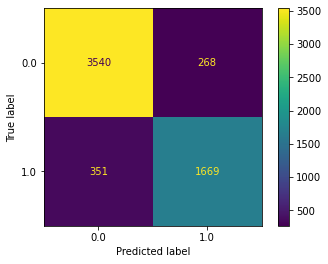

In [68]:
# Для наглядности построим график confusion matrix.
plot_confusion_matrix(svc,X_test,y_test);

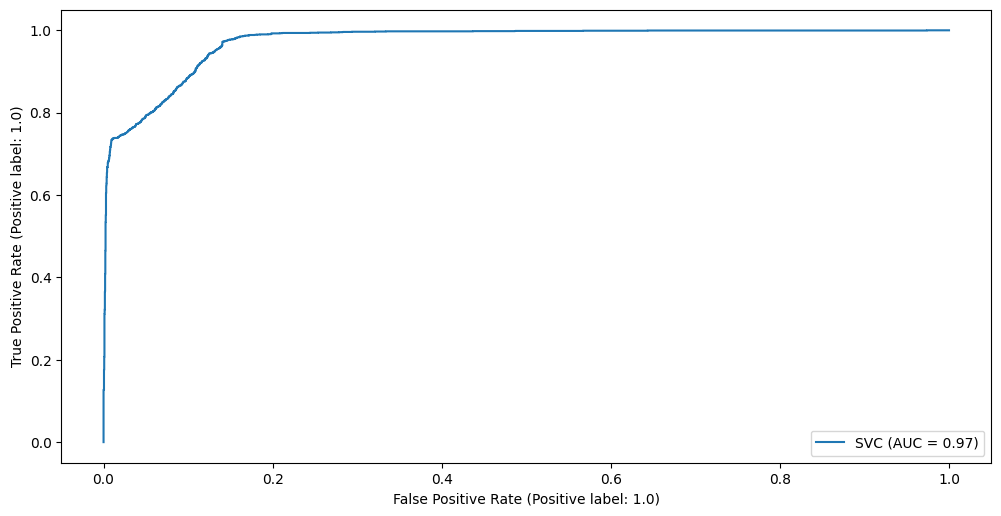

In [69]:
# Построим ROC кривую для рассматриваемой модели
fig,ax=plt.subplots(figsize=(12,6),dpi=100)
plot_roc_curve(svc,X_test,y_test,ax=ax);

## Decision Tree Classifier

In [70]:
# Для каждого атрибута в наборе данных алгоритм decision tree формирует узел, где наиболее важный атрибут помещается в корневой 
# узел. Для оценки мы начинаем с корневого узла и продвигаемся вниз по дереву, следуя за соответствующим узлом, который 
# удовлетворяет нашему условию или “решению”. Этот процесс продолжается до тех пор, пока не будет достигнут конечный узел, 
# содержащий предсказание или результат дерева решений.
from sklearn.tree import DecisionTreeClassifier

In [71]:
# Создаем объект модели машинного обучения
DTC=DecisionTreeClassifier(random_state=101)
# Для тестирования модели с различными параметрами создаем список.
params={"max_depth":[2,4],
    "max_leaf_nodes":[3,6,9],
        "min_samples_leaf":range(5,200,50),
       "min_samples_split":range(5,200,50)}

In [72]:
# При помощи GridSearchCV выполняем перебор всех сочетаний параметров.
grid_model=GridSearchCV(DTC,params,return_train_score=True,verbose=2)
# Запускаем подбор лучших сочетаний параметров при помощи GridSearchCV.fit, и передаем train данные.
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END max_depth=2, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=5; total time=   1.4s
[CV] END max_depth=2, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=5; total time=   1.3s
[CV] END max_depth=2, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=5; total time=   1.3s
[CV] END max_depth=2, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=5; total time=   1.3s
[CV] END max_depth=2, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=5; total time=   1.3s
[CV] END max_depth=2, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=55; total time=   1.4s
[CV] END max_depth=2, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=55; total time=   1.4s
[CV] END max_depth=2, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=55; total time=   1.3s
[CV] END max_depth=2, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=55; total time=   1.3s
[CV] END max_depth=2, max_leaf_nod

[CV] END max_depth=2, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5; total time=   1.4s
[CV] END max_depth=2, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5; total time=   1.2s
[CV] END max_depth=2, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5; total time=   1.2s
[CV] END max_depth=2, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5; total time=   1.3s
[CV] END max_depth=2, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5; total time=   1.3s
[CV] END max_depth=2, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=55; total time=   1.3s
[CV] END max_depth=2, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=55; total time=   1.3s
[CV] END max_depth=2, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=55; total time=   1.3s
[CV] END max_depth=2, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=55; total time=   1.3s
[CV] END max_depth=2, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=55; total time=   

[CV] END max_depth=2, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5; total time=   1.3s
[CV] END max_depth=2, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5; total time=   1.3s
[CV] END max_depth=2, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5; total time=   1.3s
[CV] END max_depth=2, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5; total time=   1.3s
[CV] END max_depth=2, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5; total time=   1.2s
[CV] END max_depth=2, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=55; total time=   1.3s
[CV] END max_depth=2, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=55; total time=   1.3s
[CV] END max_depth=2, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=55; total time=   1.3s
[CV] END max_depth=2, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=55; total time=   1.3s
[CV] END max_depth=2, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=55; total time=   

[CV] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=5; total time=   1.5s
[CV] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=5; total time=   1.5s
[CV] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=5; total time=   1.6s
[CV] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=5; total time=   1.6s
[CV] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=5; total time=   1.6s
[CV] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=55; total time=   1.7s
[CV] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=55; total time=   1.7s
[CV] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=55; total time=   1.6s
[CV] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=55; total time=   1.6s
[CV] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=55; total time=   

[CV] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5; total time=   2.4s
[CV] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5; total time=   2.2s
[CV] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5; total time=   2.3s
[CV] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5; total time=   2.3s
[CV] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5; total time=   2.4s
[CV] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=55; total time=   2.4s
[CV] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=55; total time=   2.3s
[CV] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=55; total time=   2.3s
[CV] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=55; total time=   2.2s
[CV] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=55; total time=   

[CV] END max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5; total time=   2.4s
[CV] END max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5; total time=   2.4s
[CV] END max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5; total time=   2.4s
[CV] END max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5; total time=   2.4s
[CV] END max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5; total time=   2.5s
[CV] END max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=55; total time=   2.4s
[CV] END max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=55; total time=   2.6s
[CV] END max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=55; total time=   2.6s
[CV] END max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=55; total time=   2.4s
[CV] END max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=55; total time=   

GridSearchCV(estimator=DecisionTreeClassifier(random_state=101),
             param_grid={'max_depth': [2, 4], 'max_leaf_nodes': [3, 6, 9],
                         'min_samples_leaf': range(5, 200, 50),
                         'min_samples_split': range(5, 200, 50)},
             return_train_score=True, verbose=2)

In [73]:
# Рассмотрим основные результаты подбора параметров.
cv_results=pd.DataFrame(grid_model.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.427027      0.029881         0.005002        0.000631   
1       1.418202      0.045976         0.004807        0.000403   
2       1.383798      0.039707         0.005397        0.001360   
3       1.332612      0.029000         0.004790        0.000403   
4       1.398205      0.050226         0.004595        0.000484   

  param_max_depth param_max_leaf_nodes param_min_samples_leaf  \
0               2                    3                      5   
1               2                    3                      5   
2               2                    3                      5   
3               2                    3                      5   
4               2                    3                     55   

  param_min_samples_split                                             params  \
0                       5  {'max_depth': 2, 'max_leaf_nodes': 3, 'min_sam...   
1                      55  {'max_depth': 2, 'max_leaf_nodes': 3, 'min_sam...   
2                     105  {'max_depth': 2, 'max_leaf_nodes': 3, 'min_sam...   
3                     155  {'max_depth': 2, 'max_leaf_nodes': 3, 'min_sam...   
4                       5  {'max_depth': 2, 'max_leaf_nodes': 3, 'min_sam...   

   split0_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.893337  ...         0.894342        0.001368               33   
1           0.893337  ...         0.894342        0.001368               33   
2           0.893337  ...         0.894342        0.001368               33   
3           0.893337  ...         0.894342        0.001368               33   
4           0.893337  ...         0.894342        0.001368               33   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.896668            0.900036            0.895531   
1            0.896668            0.900036            0.895531   
2            0.896668            0.900036            0.895531   
3            0.896668            0.900036            0.895531   
4            0.896668            0.900036            0.895531   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.895817            0.896317          0.896874         0.001629  
1            0.895817            0.896317          0.896874         0.001629  
2            0.895817            0.896317          0.896874         0.001629  
3            0.895817            0.896317          0.896874         0.001629  
4            0.895817            0.896317          0.896874         0.001629  

[5 rows x 24 columns]

Text(0, 0.5, 'Score')

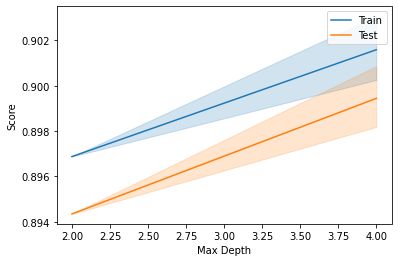

In [74]:
# Построим график зависимости параметра mean_score от param_max_depth для обучающих и тестовых данных модели Decision Tree Classifier.
sns.lineplot(data=cv_results,x="param_max_depth",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_max_depth",y="mean_test_score",label="Test")
plt.xlabel("Max Depth")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

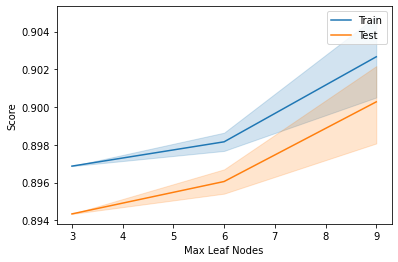

In [75]:
# Построим график зависимости параметра mean_score от param_max_leaf_nodes для обучающих и тестовых данных модели Decision Tree Classifier.
sns.lineplot(data=cv_results,x="param_max_leaf_nodes",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_max_leaf_nodes",y="mean_test_score",label="Test")
plt.xlabel("Max Leaf Nodes")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

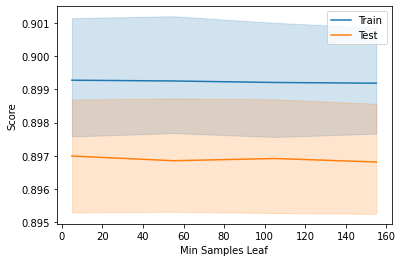

In [76]:
# Построим график зависимости параметра mean_score от param_min_samples_leaf для обучающих и тестовых данных модели Decision Tree Classifier.
sns.lineplot(data=cv_results,x="param_min_samples_leaf",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_min_samples_leaf",y="mean_test_score",label="Test")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

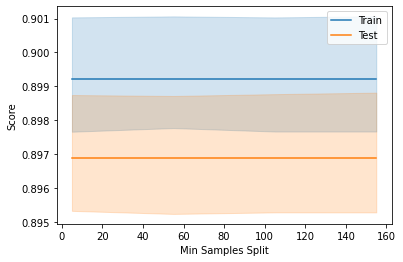

In [77]:
# Построим график зависимости параметра mean_score от param_min_samples_split для обучающих и тестовых данных модели Decision Tree Classifier.
sns.lineplot(data=cv_results,x="param_min_samples_split",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_min_samples_split",y="mean_test_score",label="Test")
plt.xlabel("Min Samples Split")
plt.ylabel("Score")

In [78]:
# Определим лучшие параметры для модели Decision Tree Classifier при помощи best_params_
grid_model.best_params_

{'max_depth': 4,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 5,
 'min_samples_split': 5}

In [79]:
# Создадим модель Decision Tree Classifier с лучшими параметрами и обучим ее на train данных.
DTC=DecisionTreeClassifier(max_depth=4,max_leaf_nodes=9,min_samples_leaf=5,min_samples_split=5,random_state=101)
DTC.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=9, min_samples_leaf=5,
                       min_samples_split=5, random_state=101)

In [80]:
# Выполним "предсказание" на обученной модели для test и train данных
y_pred=DTC.predict(X_test)
y_pred2=DTC.predict(X_train)

In [81]:
# Определим долю правильных "предсказаний" по отношению ко всем предсказаниям при помощи accuracy_score.
acc_DTC=accuracy_score(y_test,y_pred)
print("Train: ",accuracy_score(y_train,y_pred2))
print("Test: ",accuracy_score(y_test,y_pred))
# Как мы видим, для обучающих данных доля правильных предсказаний 90.89%, а для тестовых 90.43%.

Train:  0.9089296950975345
Test:  0.9042553191489362


* Since the Tree is no overfitting we will not do any pruning.

In [82]:
# Рассмотрим другие метрики качества модели
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93      3808
         1.0       0.99      0.73      0.84      2020

    accuracy                           0.90      5828
   macro avg       0.93      0.86      0.89      5828
weighted avg       0.91      0.90      0.90      5828



* Be carefoul here thoug that the recall score for 1.0 is a bit low compared to 0.0. Where our model may be a little affected by the imbalance of the data

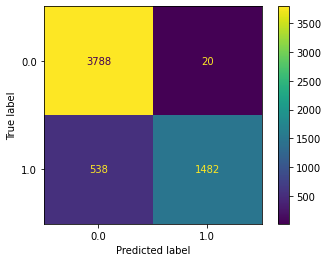

In [83]:
# Для наглядности построим график confusion matrix.
plot_confusion_matrix(DTC,X_test,y_test);

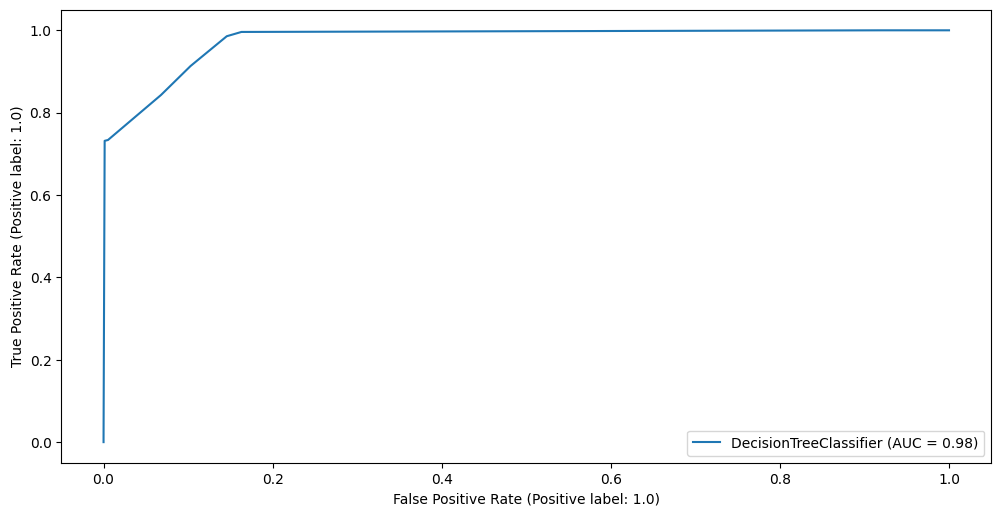

In [84]:
# Построим ROC кривую для рассматриваемой модели
fig,ax=plt.subplots(figsize=(12,6),dpi=100)
plot_roc_curve(DTC,X_test,y_test,ax=ax);

## Bagging Classifier

In [85]:
from sklearn.ensemble import BaggingClassifier
# Bagging — это тип ансамблевого подхода к машинному обучению, который объединяет результаты многих моделей для повышения 
# производительности. Эти алгоритмы работают, разбивая обучающий набор на подмножества и пропуская их через различные модели 
# машинного обучения, после чего объединяют их прогнозы, чтобы создать общий прогноз для каждого экземпляра в исходных данных.
display(Image(url='https://img-blog.csdnimg.cn/20191126164923198.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9jb2RpbmdjaGFvemhhbmcuYmxvZy5jc2RuLm5ldA==,size_16,color_FFFFFF,t_70', width = 500))

In [86]:
# Создаем объект модели машинного обучения
dt=DecisionTreeClassifier(random_state=101)
BC=BaggingClassifier(dt,random_state=101)
# Для тестирования модели с различными параметрами создаем список.
params={"max_samples":[1,5,10,20,50,100],
       "max_features":[1,5,10,15,20],
       "base_estimator__max_depth":[1,5,10,15,20]}

In [87]:
# При помощи GridSearchCV выполняем перебор всех сочетаний параметров.
grid_model=GridSearchCV(BC,params,return_train_score=True,verbose=2)
# Запускаем подбор лучших сочетаний параметров при помощи GridSearchCV.fit, и передаем train данные.
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV] END base_estimator__max_depth=1, max_features=1, max_samples=1; total time=   0.0s
[CV] END base_estimator__max_depth=1, max_features=1, max_samples=1; total time=   0.0s
[CV] END base_estimator__max_depth=1, max_features=1, max_samples=1; total time=   0.0s
[CV] END base_estimator__max_depth=1, max_features=1, max_samples=1; total time=   0.0s
[CV] END base_estimator__max_depth=1, max_features=1, max_samples=1; total time=   0.0s
[CV] END base_estimator__max_depth=1, max_features=1, max_samples=5; total time=   0.0s
[CV] END base_estimator__max_depth=1, max_features=1, max_samples=5; total time=   0.0s
[CV] END base_estimator__max_depth=1, max_features=1, max_samples=5; total time=   0.0s
[CV] END base_estimator__max_depth=1, max_features=1, max_samples=5; total time=   0.0s
[CV] END base_estimator__max_depth=1, max_features=1, max_samples=5; total time=   0.0s
[CV] END base_estimator__max_depth=1, max_features=1, max

[CV] END base_estimator__max_depth=1, max_features=15, max_samples=1; total time=   0.0s
[CV] END base_estimator__max_depth=1, max_features=15, max_samples=1; total time=   0.0s
[CV] END base_estimator__max_depth=1, max_features=15, max_samples=1; total time=   0.0s
[CV] END base_estimator__max_depth=1, max_features=15, max_samples=5; total time=   0.0s
[CV] END base_estimator__max_depth=1, max_features=15, max_samples=5; total time=   0.0s
[CV] END base_estimator__max_depth=1, max_features=15, max_samples=5; total time=   0.0s
[CV] END base_estimator__max_depth=1, max_features=15, max_samples=5; total time=   0.0s
[CV] END base_estimator__max_depth=1, max_features=15, max_samples=5; total time=   0.0s
[CV] END base_estimator__max_depth=1, max_features=15, max_samples=10; total time=   0.0s
[CV] END base_estimator__max_depth=1, max_features=15, max_samples=10; total time=   0.0s
[CV] END base_estimator__max_depth=1, max_features=15, max_samples=10; total time=   0.0s
[CV] END base_esti

[CV] END base_estimator__max_depth=5, max_features=5, max_samples=1; total time=   0.0s
[CV] END base_estimator__max_depth=5, max_features=5, max_samples=5; total time=   0.0s
[CV] END base_estimator__max_depth=5, max_features=5, max_samples=5; total time=   0.0s
[CV] END base_estimator__max_depth=5, max_features=5, max_samples=5; total time=   0.0s
[CV] END base_estimator__max_depth=5, max_features=5, max_samples=5; total time=   0.0s
[CV] END base_estimator__max_depth=5, max_features=5, max_samples=5; total time=   0.0s
[CV] END base_estimator__max_depth=5, max_features=5, max_samples=10; total time=   0.0s
[CV] END base_estimator__max_depth=5, max_features=5, max_samples=10; total time=   0.0s
[CV] END base_estimator__max_depth=5, max_features=5, max_samples=10; total time=   0.0s
[CV] END base_estimator__max_depth=5, max_features=5, max_samples=10; total time=   0.0s
[CV] END base_estimator__max_depth=5, max_features=5, max_samples=10; total time=   0.0s
[CV] END base_estimator__ma

[CV] END base_estimator__max_depth=5, max_features=20, max_samples=5; total time=   0.0s
[CV] END base_estimator__max_depth=5, max_features=20, max_samples=5; total time=   0.0s
[CV] END base_estimator__max_depth=5, max_features=20, max_samples=5; total time=   0.0s
[CV] END base_estimator__max_depth=5, max_features=20, max_samples=10; total time=   0.0s
[CV] END base_estimator__max_depth=5, max_features=20, max_samples=10; total time=   0.0s
[CV] END base_estimator__max_depth=5, max_features=20, max_samples=10; total time=   0.0s
[CV] END base_estimator__max_depth=5, max_features=20, max_samples=10; total time=   0.0s
[CV] END base_estimator__max_depth=5, max_features=20, max_samples=10; total time=   0.0s
[CV] END base_estimator__max_depth=5, max_features=20, max_samples=20; total time=   0.0s
[CV] END base_estimator__max_depth=5, max_features=20, max_samples=20; total time=   0.0s
[CV] END base_estimator__max_depth=5, max_features=20, max_samples=20; total time=   0.0s
[CV] END base

[CV] END base_estimator__max_depth=10, max_features=10, max_samples=5; total time=   0.0s
[CV] END base_estimator__max_depth=10, max_features=10, max_samples=10; total time=   0.0s
[CV] END base_estimator__max_depth=10, max_features=10, max_samples=10; total time=   0.0s
[CV] END base_estimator__max_depth=10, max_features=10, max_samples=10; total time=   0.0s
[CV] END base_estimator__max_depth=10, max_features=10, max_samples=10; total time=   0.0s
[CV] END base_estimator__max_depth=10, max_features=10, max_samples=10; total time=   0.0s
[CV] END base_estimator__max_depth=10, max_features=10, max_samples=20; total time=   0.0s
[CV] END base_estimator__max_depth=10, max_features=10, max_samples=20; total time=   0.0s
[CV] END base_estimator__max_depth=10, max_features=10, max_samples=20; total time=   0.0s
[CV] END base_estimator__max_depth=10, max_features=10, max_samples=20; total time=   0.0s
[CV] END base_estimator__max_depth=10, max_features=10, max_samples=20; total time=   0.0s


[CV] END base_estimator__max_depth=15, max_features=1, max_samples=10; total time=   0.0s
[CV] END base_estimator__max_depth=15, max_features=1, max_samples=10; total time=   0.0s
[CV] END base_estimator__max_depth=15, max_features=1, max_samples=10; total time=   0.0s
[CV] END base_estimator__max_depth=15, max_features=1, max_samples=10; total time=   0.0s
[CV] END base_estimator__max_depth=15, max_features=1, max_samples=20; total time=   0.0s
[CV] END base_estimator__max_depth=15, max_features=1, max_samples=20; total time=   0.0s
[CV] END base_estimator__max_depth=15, max_features=1, max_samples=20; total time=   0.0s
[CV] END base_estimator__max_depth=15, max_features=1, max_samples=20; total time=   0.0s
[CV] END base_estimator__max_depth=15, max_features=1, max_samples=20; total time=   0.0s
[CV] END base_estimator__max_depth=15, max_features=1, max_samples=50; total time=   0.0s
[CV] END base_estimator__max_depth=15, max_features=1, max_samples=50; total time=   0.0s
[CV] END b

[CV] END base_estimator__max_depth=15, max_features=15, max_samples=10; total time=   0.0s
[CV] END base_estimator__max_depth=15, max_features=15, max_samples=10; total time=   0.0s
[CV] END base_estimator__max_depth=15, max_features=15, max_samples=10; total time=   0.0s
[CV] END base_estimator__max_depth=15, max_features=15, max_samples=20; total time=   0.0s
[CV] END base_estimator__max_depth=15, max_features=15, max_samples=20; total time=   0.0s
[CV] END base_estimator__max_depth=15, max_features=15, max_samples=20; total time=   0.0s
[CV] END base_estimator__max_depth=15, max_features=15, max_samples=20; total time=   0.0s
[CV] END base_estimator__max_depth=15, max_features=15, max_samples=20; total time=   0.0s
[CV] END base_estimator__max_depth=15, max_features=15, max_samples=50; total time=   0.0s
[CV] END base_estimator__max_depth=15, max_features=15, max_samples=50; total time=   0.0s
[CV] END base_estimator__max_depth=15, max_features=15, max_samples=50; total time=   0.0s

[CV] END base_estimator__max_depth=20, max_features=5, max_samples=10; total time=   0.0s
[CV] END base_estimator__max_depth=20, max_features=5, max_samples=10; total time=   0.0s
[CV] END base_estimator__max_depth=20, max_features=5, max_samples=20; total time=   0.0s
[CV] END base_estimator__max_depth=20, max_features=5, max_samples=20; total time=   0.0s
[CV] END base_estimator__max_depth=20, max_features=5, max_samples=20; total time=   0.0s
[CV] END base_estimator__max_depth=20, max_features=5, max_samples=20; total time=   0.0s
[CV] END base_estimator__max_depth=20, max_features=5, max_samples=20; total time=   0.0s
[CV] END base_estimator__max_depth=20, max_features=5, max_samples=50; total time=   0.0s
[CV] END base_estimator__max_depth=20, max_features=5, max_samples=50; total time=   0.0s
[CV] END base_estimator__max_depth=20, max_features=5, max_samples=50; total time=   0.0s
[CV] END base_estimator__max_depth=20, max_features=5, max_samples=50; total time=   0.0s
[CV] END b

[CV] END base_estimator__max_depth=20, max_features=20, max_samples=10; total time=   0.0s
[CV] END base_estimator__max_depth=20, max_features=20, max_samples=20; total time=   0.0s
[CV] END base_estimator__max_depth=20, max_features=20, max_samples=20; total time=   0.0s
[CV] END base_estimator__max_depth=20, max_features=20, max_samples=20; total time=   0.0s
[CV] END base_estimator__max_depth=20, max_features=20, max_samples=20; total time=   0.0s
[CV] END base_estimator__max_depth=20, max_features=20, max_samples=20; total time=   0.0s
[CV] END base_estimator__max_depth=20, max_features=20, max_samples=50; total time=   0.0s
[CV] END base_estimator__max_depth=20, max_features=20, max_samples=50; total time=   0.0s
[CV] END base_estimator__max_depth=20, max_features=20, max_samples=50; total time=   0.0s
[CV] END base_estimator__max_depth=20, max_features=20, max_samples=50; total time=   0.1s
[CV] END base_estimator__max_depth=20, max_features=20, max_samples=50; total time=   0.1s

GridSearchCV(estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=101),
                                         random_state=101),
             param_grid={'base_estimator__max_depth': [1, 5, 10, 15, 20],
                         'max_features': [1, 5, 10, 15, 20],
                         'max_samples': [1, 5, 10, 20, 50, 100]},
             return_train_score=True, verbose=2)

In [88]:
# Рассмотрим основные результаты подбора параметров.
cv_results=pd.DataFrame(grid_model.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.042401      0.003607         0.004006        0.000641   
1       0.038802      0.001470         0.003996        0.000631   
2       0.036613      0.001025         0.004000        0.000632   
3       0.038027      0.001097         0.003991        0.000012   
4       0.036615      0.000502         0.003798        0.000400   

  param_base_estimator__max_depth param_max_features param_max_samples  \
0                               1                  1                 1   
1                               1                  1                 5   
2                               1                  1                10   
3                               1                  1                20   
4                               1                  1                50   

                                              params  split0_test_score  \
0  {'base_estimator__max_depth': 1, 'max_features...           0.660566   
1  {'base_estimator__max_depth': 1, 'max_features...           0.582213   
2  {'base_estimator__max_depth': 1, 'max_features...           0.621676   
3  {'base_estimator__max_depth': 1, 'max_features...           0.639119   
4  {'base_estimator__max_depth': 1, 'max_features...           0.662854   

   split1_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.660469  ...         0.660546        0.000111               37   
1           0.556922  ...         0.610836        0.035394              150   
2           0.638730  ...         0.637264        0.010734              132   
3           0.660755  ...         0.648304        0.008727               99   
4           0.659897  ...         0.660660        0.001319               36   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.660541            0.660565            0.660565   
1            0.597755            0.549803            0.632749   
2            0.626859            0.630104            0.644905   
3            0.634797            0.661566            0.648695   
4            0.660469            0.660779            0.660779   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.660565            0.660493          0.660546         0.000028  
1            0.632678            0.654129          0.613423         0.036590  
2            0.627458            0.650697          0.636005         0.009865  
3            0.634251            0.656060          0.647074         0.011032  
4            0.659778            0.660064          0.660374         0.000397  

[5 rows x 23 columns]

Text(0, 0.5, 'Score')

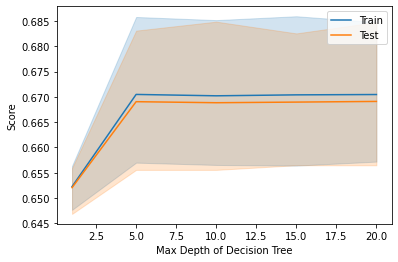

In [89]:
# Построим график зависимости параметра mean_score от param_base_estimator__max_depth для обучающих и тестовых данных модели Bagging Classifier.
sns.lineplot(data=cv_results,x="param_base_estimator__max_depth",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_base_estimator__max_depth",y="mean_test_score",label="Test")
plt.xlabel("Max Depth of Decision Tree")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

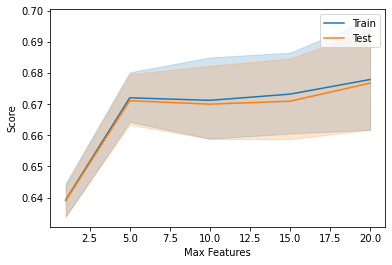

In [90]:
# Построим график зависимости параметра mean_score от param_max_features для обучающих и тестовых данных модели Bagging Classifier.
sns.lineplot(data=cv_results,x="param_max_features",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_max_features",y="mean_test_score",label="Test")
plt.xlabel("Max Features")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

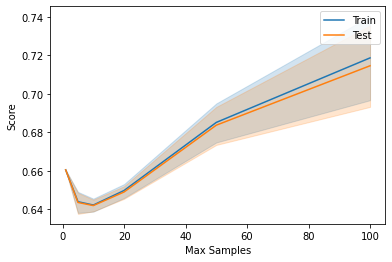

In [91]:
# Построим график зависимости параметра mean_score от param_max_samples для обучающих и тестовых данных модели Bagging Classifier.
sns.lineplot(data=cv_results,x="param_max_samples",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_max_samples",y="mean_test_score",label="Test")
plt.xlabel("Max Samples")
plt.ylabel("Score")

In [92]:
# Определим лучшие параметры для модели Bagging Classifier при помощи best_params_
grid_model.best_params_

{'base_estimator__max_depth': 5, 'max_features': 20, 'max_samples': 100}

In [93]:
# Создадим модель Bagging Classifier с лучшими параметрами и обучим ее на train данных.
dt=DecisionTreeClassifier(max_depth=5,random_state=101)
BC=BaggingClassifier(dt,random_state=101,max_features=20,max_samples=100)
BC.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                        random_state=101),
                  max_features=20, max_samples=100, random_state=101)

In [94]:
# Выполним "предсказание" на обученной модели для test и train данных
y_pred=BC.predict(X_test)
y_pred2=BC.predict(X_train)

In [95]:
# Определим долю правильных "предсказаний" по отношению ко всем предсказаниям при помощи accuracy_score.
acc_BC=accuracy_score(y_test,y_pred)
print("Train: ",accuracy_score(y_train,y_pred2))
print("Test: ",accuracy_score(y_test,y_pred))
# Как мы видим, для обучающих данных доля правильных предсказаний 80.47%, а для тестовых 79.5%.

Train:  0.7789600137291917
Test:  0.7611530542210021


In [96]:
# Рассмотрим другие метрики качества модели
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.89      0.83      3808
         1.0       0.72      0.52      0.60      2020

    accuracy                           0.76      5828
   macro avg       0.75      0.70      0.71      5828
weighted avg       0.76      0.76      0.75      5828



* Here we the Bagging being hardly affected by the imbalance. Something to check in the future if we wanna use this model

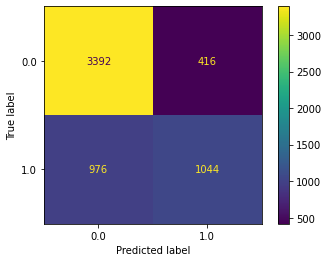

In [97]:
# Для наглядности построим график confusion matrix.
plot_confusion_matrix(BC,X_test,y_test);

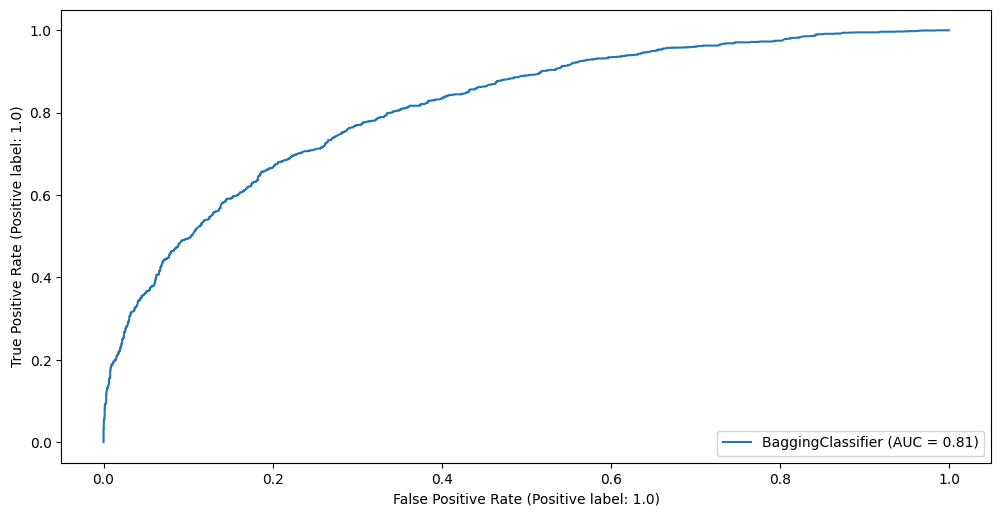

In [98]:
# Построим ROC кривую для рассматриваемой модели
fig,ax=plt.subplots(figsize=(12,6),dpi=100)
plot_roc_curve(BC,X_test,y_test,ax=ax);

## Random Forest Classifier

In [99]:
from sklearn.ensemble import RandomForestClassifier
# Алгоритм дерева решений переобучается, если не ограничить его максимальную глубину. Он обладает неограниченной гибкостью и 
# может разрастаться, пока не достигнет состояния идеальной классификации, в которой каждому образцу из набора данных будет 
# соответствовать один лист. Если вернуться назад к созданию дерева и ограничить его глубину двумя слоями (сделав только одно 
# разделение), классификация больше не будет на 100 % верной. Мы уменьшаем вариативность за счёт увеличения погрешности.
# В качестве альтернативы ограничению глубины, которое ведёт к уменьшению вариативности (хорошо) и увеличению погрешности 
# (плохо), мы можем собрать множество деревьев в единую модель. Это и будет классификатор на основе комитета деревьев принятия 
# ешений или просто «случайный лес».

In [100]:
# Создаем объект модели машинного обучения
RFC=RandomForestClassifier(random_state=101)
# Для тестирования модели с различными параметрами создаем список.
params={
    "n_estimators":[30,64,100,128,200],
    "max_features":[2,3,4],
    "max_depth":[4,8,10,15]}

In [101]:
# При помощи GridSearchCV выполняем перебор всех сочетаний параметров.
grid_model=GridSearchCV(RFC,params,return_train_score=True,verbose=2)
# Запускаем подбор лучших сочетаний параметров при помощи GridSearchCV.fit, и передаем train данные.
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END .......max_depth=4, max_features=2, n_estimators=30; total time=   0.3s
[CV] END .......max_depth=4, max_features=2, n_estimators=30; total time=   0.3s
[CV] END .......max_depth=4, max_features=2, n_estimators=30; total time=   0.3s
[CV] END .......max_depth=4, max_features=2, n_estimators=30; total time=   0.3s
[CV] END .......max_depth=4, max_features=2, n_estimators=30; total time=   0.3s
[CV] END .......max_depth=4, max_features=2, n_estimators=64; total time=   0.7s
[CV] END .......max_depth=4, max_features=2, n_estimators=64; total time=   0.8s
[CV] END .......max_depth=4, max_features=2, n_estimators=64; total time=   0.7s
[CV] END .......max_depth=4, max_features=2, n_estimators=64; total time=   0.7s
[CV] END .......max_depth=4, max_features=2, n_estimators=64; total time=   0.7s
[CV] END ......max_depth=4, max_features=2, n_estimators=100; total time=   1.1s
[CV] END ......max_depth=4, max_features=2, n_e

[CV] END .......max_depth=8, max_features=3, n_estimators=30; total time=   0.7s
[CV] END .......max_depth=8, max_features=3, n_estimators=30; total time=   0.7s
[CV] END .......max_depth=8, max_features=3, n_estimators=30; total time=   0.7s
[CV] END .......max_depth=8, max_features=3, n_estimators=30; total time=   0.7s
[CV] END .......max_depth=8, max_features=3, n_estimators=64; total time=   1.6s
[CV] END .......max_depth=8, max_features=3, n_estimators=64; total time=   1.6s
[CV] END .......max_depth=8, max_features=3, n_estimators=64; total time=   1.6s
[CV] END .......max_depth=8, max_features=3, n_estimators=64; total time=   1.6s
[CV] END .......max_depth=8, max_features=3, n_estimators=64; total time=   1.6s
[CV] END ......max_depth=8, max_features=3, n_estimators=100; total time=   2.6s
[CV] END ......max_depth=8, max_features=3, n_estimators=100; total time=   2.9s
[CV] END ......max_depth=8, max_features=3, n_estimators=100; total time=   2.6s
[CV] END ......max_depth=8, 

[CV] END ......max_depth=10, max_features=4, n_estimators=30; total time=   1.1s
[CV] END ......max_depth=10, max_features=4, n_estimators=30; total time=   1.1s
[CV] END ......max_depth=10, max_features=4, n_estimators=64; total time=   2.4s
[CV] END ......max_depth=10, max_features=4, n_estimators=64; total time=   2.4s
[CV] END ......max_depth=10, max_features=4, n_estimators=64; total time=   2.4s
[CV] END ......max_depth=10, max_features=4, n_estimators=64; total time=   2.4s
[CV] END ......max_depth=10, max_features=4, n_estimators=64; total time=   2.4s
[CV] END .....max_depth=10, max_features=4, n_estimators=100; total time=   3.8s
[CV] END .....max_depth=10, max_features=4, n_estimators=100; total time=   3.8s
[CV] END .....max_depth=10, max_features=4, n_estimators=100; total time=   3.8s
[CV] END .....max_depth=10, max_features=4, n_estimators=100; total time=   3.7s
[CV] END .....max_depth=10, max_features=4, n_estimators=100; total time=   3.8s
[CV] END .....max_depth=10, 

GridSearchCV(estimator=RandomForestClassifier(random_state=101),
             param_grid={'max_depth': [4, 8, 10, 15], 'max_features': [2, 3, 4],
                         'n_estimators': [30, 64, 100, 128, 200]},
             return_train_score=True, verbose=2)

In [102]:
# Рассмотрим основные результаты подбора параметров.
cv_results=pd.DataFrame(grid_model.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.376819      0.026061         0.017193        0.001453   
1       0.802215      0.031266         0.035015        0.001102   
2       1.224214      0.041078         0.051600        0.004802   
3       1.560420      0.045272         0.063001        0.005203   
4       2.262445      0.049409         0.086191        0.007555   

  param_max_depth param_max_features param_n_estimators  \
0               4                  2                 30   
1               4                  2                 64   
2               4                  2                100   
3               4                  2                128   
4               4                  2                200   

                                              params  split0_test_score  \
0  {'max_depth': 4, 'max_features': 2, 'n_estimat...           0.698599   
1  {'max_depth': 4, 'max_features': 2, 'n_estimat...           0.666285   
2  {'max_depth': 4, 'max_features': 2, 'n_estimat...           0.668287   
3  {'max_depth': 4, 'max_features': 2, 'n_estimat...           0.661996   
4  {'max_depth': 4, 'max_features': 2, 'n_estimat...           0.663712   

   split1_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.698799  ...         0.693324        0.009947               56   
1           0.670481  ...         0.671815        0.005037               58   
2           0.679920  ...         0.672159        0.005139               57   
3           0.669622  ...         0.665237        0.002977               60   
4           0.669336  ...         0.665465        0.002805               59   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.704233            0.697748            0.707901   
1            0.670409            0.672721            0.680157   
2            0.673484            0.680944            0.677798   
3            0.663401            0.672292            0.669646   
4            0.667763            0.674008            0.671791   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.698892            0.678942          0.697543         0.009999  
1            0.675724            0.668716          0.673546         0.004057  
2            0.675152            0.665070          0.674489         0.005344  
3            0.670290            0.662496          0.667625         0.003927  
4            0.668573            0.661995          0.668826         0.004087  

[5 rows x 23 columns]

Text(0, 0.5, 'Score')

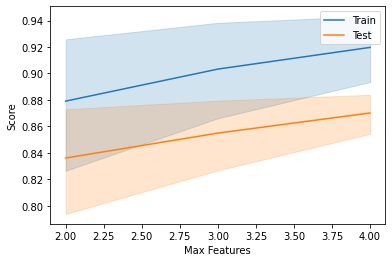

In [103]:
# Построим график зависимости параметра mean_score от param_max_features для обучающих и тестовых данных модели Random Forest Classifier.
sns.lineplot(data=cv_results,x="param_max_features",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_max_features",y="mean_test_score",label="Test")
plt.xlabel("Max Features")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

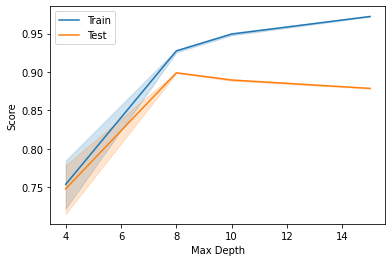

In [104]:
# Построим график зависимости параметра mean_score от param_max_depth для обучающих и тестовых данных модели Random Forest Classifier.
sns.lineplot(data=cv_results,x="param_max_depth",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_max_depth",y="mean_test_score",label="Test")
plt.xlabel("Max Depth")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

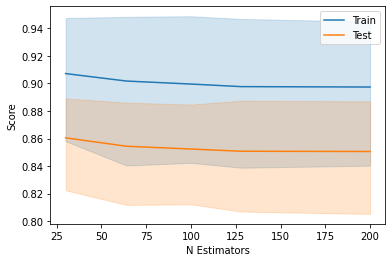

In [105]:
# Построим график зависимости параметра mean_score от param_n_estimators для обучающих и тестовых данных модели Random Forest Classifier.
sns.lineplot(data=cv_results,x="param_n_estimators",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_n_estimators",y="mean_test_score",label="Test")
plt.xlabel("N Estimators")
plt.ylabel("Score")

In [106]:
# Определим лучшие параметры для модели Random Forest Classifier при помощи best_params_
grid_model.best_params_

{'max_depth': 8, 'max_features': 2, 'n_estimators': 128}

In [107]:
# Создадим модель Ridge Classifier с лучшими параметрами и обучим ее на train данных.
RFC=RandomForestClassifier(random_state=101,max_depth=8,max_features=2,n_estimators=200)
RFC.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, max_features=2, n_estimators=200,
                       random_state=101)

In [108]:
# Выполним "предсказание" на обученной модели для test и train данных
y_pred=RFC.predict(X_test)
y_pred2=RFC.predict(X_train)

In [109]:
# Определим долю правильных "предсказаний" по отношению ко всем предсказаниям при помощи accuracy_score.
acc_RFC=accuracy_score(y_test,y_pred)
print("Train: ",accuracy_score(y_train,y_pred2))
print("Test: ",accuracy_score(y_test,y_pred))
# Как мы видим, для обучающих данных доля правильных предсказаний 91.92%, а для тестовых 89.84%.

Train:  0.9197414335564327
Test:  0.8984214138641043


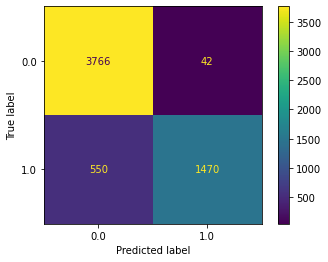

In [110]:
# Для наглядности построим график confusion matrix.
plot_confusion_matrix(RFC,X_test,y_test);

In [111]:
# Рассмотрим другие метрики качества модели
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93      3808
         1.0       0.97      0.73      0.83      2020

    accuracy                           0.90      5828
   macro avg       0.92      0.86      0.88      5828
weighted avg       0.91      0.90      0.89      5828



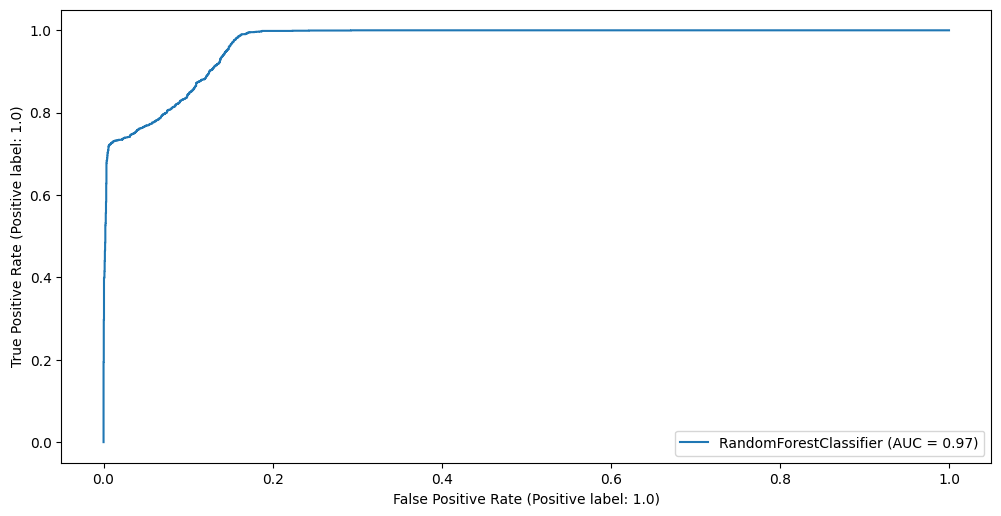

In [112]:
# Построим ROC кривую для рассматриваемой модели
fig,ax=plt.subplots(figsize=(12,6),dpi=100)
plot_roc_curve(RFC,X_test,y_test,ax=ax);

## Extra Trees Classifier

In [113]:
from sklearn.ensemble import ExtraTreesClassifier
# Extra Trees Classifier — это метод ансамблевого обучения, который объединяет результаты нескольких не коррелированных деревьев
# решений, собранных в «лесу», для вывода результатов классификации. По своей концепции он очень похож на классификатор 
# случайных лесов и отличается от него только способом построения деревьев решений в лесу.

In [114]:
# Создаем объект модели машинного обучения
ETC=ExtraTreesClassifier(random_state=101)

In [115]:
# Для тестирования модели с различными параметрами создаем список.
params={
    "n_estimators":[30,64,100,128,200],
    "max_features":[2,3,4],
    "max_depth":[4,8,10,15]}
     

In [116]:
# При помощи GridSearchCV выполняем перебор всех сочетаний параметров.
grid_model=GridSearchCV(ETC,params,return_train_score=True,verbose=2)
# Запускаем подбор лучших сочетаний параметров при помощи GridSearchCV.fit, и передаем train данные.
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END .......max_depth=4, max_features=2, n_estimators=30; total time=   0.1s
[CV] END .......max_depth=4, max_features=2, n_estimators=30; total time=   0.1s
[CV] END .......max_depth=4, max_features=2, n_estimators=30; total time=   0.1s
[CV] END .......max_depth=4, max_features=2, n_estimators=30; total time=   0.1s
[CV] END .......max_depth=4, max_features=2, n_estimators=30; total time=   0.1s
[CV] END .......max_depth=4, max_features=2, n_estimators=64; total time=   0.2s
[CV] END .......max_depth=4, max_features=2, n_estimators=64; total time=   0.2s
[CV] END .......max_depth=4, max_features=2, n_estimators=64; total time=   0.3s
[CV] END .......max_depth=4, max_features=2, n_estimators=64; total time=   0.3s
[CV] END .......max_depth=4, max_features=2, n_estimators=64; total time=   0.3s
[CV] END ......max_depth=4, max_features=2, n_estimators=100; total time=   0.4s
[CV] END ......max_depth=4, max_features=2, n_e

[CV] END .......max_depth=8, max_features=3, n_estimators=30; total time=   0.2s
[CV] END .......max_depth=8, max_features=3, n_estimators=30; total time=   0.2s
[CV] END .......max_depth=8, max_features=3, n_estimators=30; total time=   0.2s
[CV] END .......max_depth=8, max_features=3, n_estimators=30; total time=   0.2s
[CV] END .......max_depth=8, max_features=3, n_estimators=64; total time=   0.5s
[CV] END .......max_depth=8, max_features=3, n_estimators=64; total time=   0.5s
[CV] END .......max_depth=8, max_features=3, n_estimators=64; total time=   0.5s
[CV] END .......max_depth=8, max_features=3, n_estimators=64; total time=   0.5s
[CV] END .......max_depth=8, max_features=3, n_estimators=64; total time=   0.6s
[CV] END ......max_depth=8, max_features=3, n_estimators=100; total time=   0.9s
[CV] END ......max_depth=8, max_features=3, n_estimators=100; total time=   0.8s
[CV] END ......max_depth=8, max_features=3, n_estimators=100; total time=   0.9s
[CV] END ......max_depth=8, 

[CV] END ......max_depth=10, max_features=4, n_estimators=30; total time=   0.3s
[CV] END ......max_depth=10, max_features=4, n_estimators=30; total time=   0.3s
[CV] END ......max_depth=10, max_features=4, n_estimators=64; total time=   0.7s
[CV] END ......max_depth=10, max_features=4, n_estimators=64; total time=   0.7s
[CV] END ......max_depth=10, max_features=4, n_estimators=64; total time=   0.7s
[CV] END ......max_depth=10, max_features=4, n_estimators=64; total time=   0.7s
[CV] END ......max_depth=10, max_features=4, n_estimators=64; total time=   0.7s
[CV] END .....max_depth=10, max_features=4, n_estimators=100; total time=   1.1s
[CV] END .....max_depth=10, max_features=4, n_estimators=100; total time=   1.1s
[CV] END .....max_depth=10, max_features=4, n_estimators=100; total time=   1.1s
[CV] END .....max_depth=10, max_features=4, n_estimators=100; total time=   1.1s
[CV] END .....max_depth=10, max_features=4, n_estimators=100; total time=   1.1s
[CV] END .....max_depth=10, 

GridSearchCV(estimator=ExtraTreesClassifier(random_state=101),
             param_grid={'max_depth': [4, 8, 10, 15], 'max_features': [2, 3, 4],
                         'n_estimators': [30, 64, 100, 128, 200]},
             return_train_score=True, verbose=2)

In [117]:
# Рассмотрим основные результаты подбора параметров.
cv_results=pd.DataFrame(grid_model.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.156427      0.003773         0.016194        0.000404   
1       0.321431      0.020306         0.030975        0.004156   
2       0.466414      0.023813         0.042974        0.004824   
3       0.555841      0.023604         0.047802        0.000979   
4       0.828428      0.002404         0.073983        0.002903   

  param_max_depth param_max_features param_n_estimators  \
0               4                  2                 30   
1               4                  2                 64   
2               4                  2                100   
3               4                  2                128   
4               4                  2                200   

                                              params  split0_test_score  \
0  {'max_depth': 4, 'max_features': 2, 'n_estimat...           0.660566   
1  {'max_depth': 4, 'max_features': 2, 'n_estimat...           0.660566   
2  {'max_depth': 4, 'max_features': 2, 'n_estimat...           0.660566   
3  {'max_depth': 4, 'max_features': 2, 'n_estimat...           0.660566   
4  {'max_depth': 4, 'max_features': 2, 'n_estimat...           0.660566   

   split1_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.660469  ...         0.660546        0.000111               14   
1           0.660469  ...         0.660546        0.000111               14   
2           0.660469  ...         0.660546        0.000111               14   
3           0.660469  ...         0.660546        0.000111               14   
4           0.660469  ...         0.660546        0.000111               14   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.660541            0.660565            0.660565   
1            0.660541            0.660565            0.660565   
2            0.660541            0.660565            0.660565   
3            0.660541            0.660565            0.660565   
4            0.660541            0.660565            0.660565   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.660565            0.660493          0.660546         0.000028  
1            0.660565            0.660493          0.660546         0.000028  
2            0.660565            0.660493          0.660546         0.000028  
3            0.660565            0.660493          0.660546         0.000028  
4            0.660565            0.660493          0.660546         0.000028  

[5 rows x 23 columns]

Text(0, 0.5, 'Score')

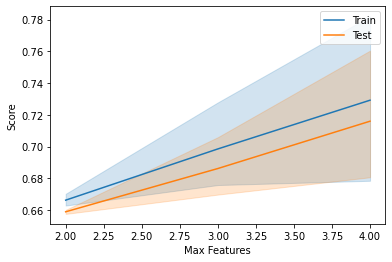

In [118]:
# Построим график зависимости параметра mean_score от param_max_features для обучающих и тестовых данных модели Extra Trees Classifier.
sns.lineplot(data=cv_results,x="param_max_features",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_max_features",y="mean_test_score",label="Test")
plt.xlabel("Max Features")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

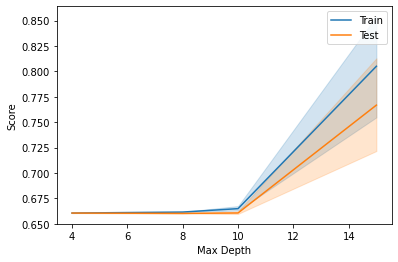

In [119]:
# Построим график зависимости параметра mean_score от param_max_depth для обучающих и тестовых данных модели Extra Trees Classifier.
sns.lineplot(data=cv_results,x="param_max_depth",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_max_depth",y="mean_test_score",label="Test")
plt.xlabel("Max Depth")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

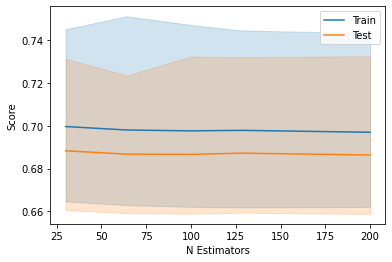

In [120]:
# Построим график зависимости параметра mean_score от param_n_estimators для обучающих и тестовых данных модели Extra Trees Classifier.
sns.lineplot(data=cv_results,x="param_n_estimators",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_n_estimators",y="mean_test_score",label="Test")
plt.xlabel("N Estimators")
plt.ylabel("Score")

In [121]:
# Определим лучшие параметры для модели Extra Trees Classifier при помощи best_params_
grid_model.best_params_

{'max_depth': 15, 'max_features': 4, 'n_estimators': 200}

In [122]:
# Создадим модель Extra Trees Classifier с лучшими параметрами и обучим ее на train данных.
ETC=ExtraTreesClassifier(random_state=101,max_depth=15,max_features=4,n_estimators=128)
ETC.fit(X_train,y_train)

ExtraTreesClassifier(max_depth=15, max_features=4, n_estimators=128,
                     random_state=101)

In [123]:
# Выполним "предсказание" на обученной модели для test и train данных
y_pred=ETC.predict(X_test)
y_pred2=ETC.predict(X_train)

In [124]:
# Определим долю правильных "предсказаний" по отношению ко всем предсказаниям при помощи accuracy_score.
acc_ETC=accuracy_score(y_test,y_pred)
print("Train: ",accuracy_score(y_train,y_pred2))
print("Test: ",accuracy_score(y_test,y_pred))
# Как мы видим, для обучающих данных доля правильных предсказаний 92.03%, а для тестовых 88.02%.

Train:  0.92992391739603
Test:  0.8860672614962252


In [125]:
# Рассмотрим другие метрики качества модели
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92      3808
         1.0       0.93      0.72      0.81      2020

    accuracy                           0.89      5828
   macro avg       0.90      0.85      0.87      5828
weighted avg       0.89      0.89      0.88      5828



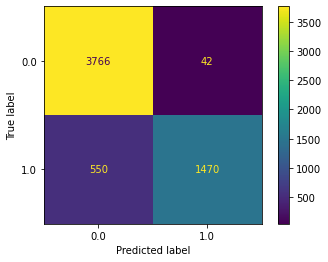

In [126]:
# Для наглядности построим график confusion matrix.
plot_confusion_matrix(RFC,X_test,y_test);

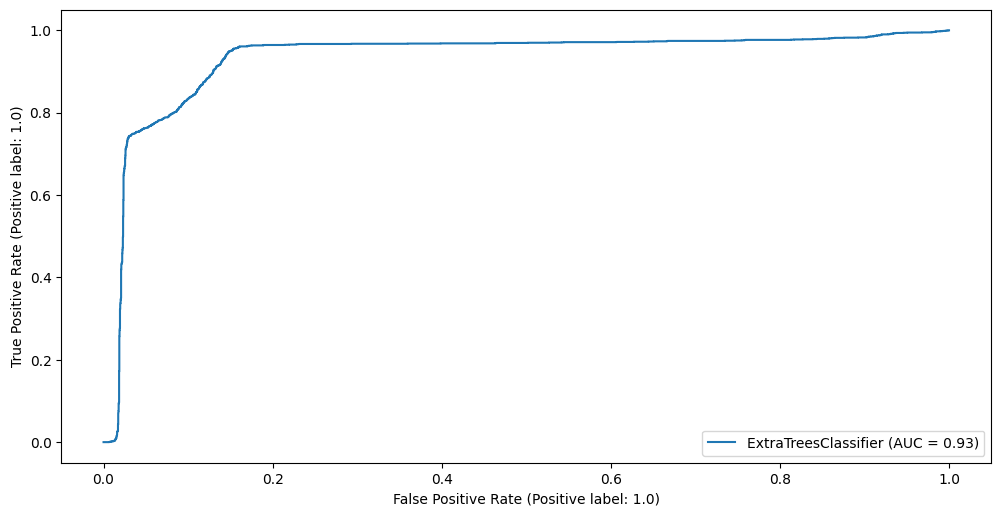

In [127]:
# Построим ROC кривую для рассматриваемой модели
fig,ax=plt.subplots(figsize=(12,6),dpi=100)
plot_roc_curve(ETC,X_test,y_test,ax=ax);

## Ada Boost Classifier

In [128]:
from sklearn.ensemble import AdaBoostClassifier
# AdaBoost можно использовать для повышения производительности алгоритмов машинного обучения. Он лучше всего работает со 
# слабыми обучающими алгоритмами, поэтому такие модели могут достигнуть точности гораздо выше случайной при решении задачи 
# классификации. Наиболее распространенными алгоритмами, используемыми с AdaBoost, являются одноуровневые деревья решений. 
# Слабый обучающий алгоритм – это классификатор или алгоритм предсказания, который работает относительно плохо в плане точности.
# Помимо этого, можно сказать, что слабые классификаторы легко вычисляются, поэтому можно объединять много сущностей алгоритма,
# чтобы создать более сильный классификатор с помощью бустинга.
# Если говорить проще:
# Вы просматриваете все наблюдения, на которых обучается алгоритм машинного обучения, и оставляете только
# те наблюдения, которые метод машинного обучения успешно классифицировал, вычеркивая другие наблюдения. Новый слабый ученик 
# создается и тестируется на наборе данных, которые были плохо классифицированы, а затем сохраняются только примеры, которые были 
# успешно классифицированы.

In [129]:
# Создаем объект модели машинного обучения
ABC=AdaBoostClassifier(random_state=101)
# Обучим ее на train данных
ABC.fit(X_train,y_train)

AdaBoostClassifier(random_state=101)

In [130]:
# Выполним "предсказание" на обученной модели для test и train данных
y_pred=ABC.predict(X_test)
y_pred2=ABC.predict(X_train)

In [131]:
# Определим долю правильных "предсказаний" по отношению ко всем предсказаниям при помощи accuracy_score.
acc_ABC=accuracy_score(y_test,y_pred)
print("Train: ",accuracy_score(y_train,y_pred2))
print("Test: ",accuracy_score(y_test,y_pred))
# Как мы видим, для обучающих данных доля правильных предсказаний 91.47%, а для тестовых 89.69%.

Train:  0.9133916823980321
Test:  0.8977350720658888


* If you wonder, i didnt do grid because on my computer it was taking to loong. Consider that i just have 4gb and i3. So in a normal machine it would go faster. I would encourage you to do it, since the ADA with no hyperparameter tunning got a really good score

In [132]:
# Рассмотрим другие метрики качества модели
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92      3808
         1.0       0.84      0.87      0.85      2020

    accuracy                           0.90      5828
   macro avg       0.89      0.89      0.89      5828
weighted avg       0.90      0.90      0.90      5828



* Here we see ADA handling imbalance pretty well

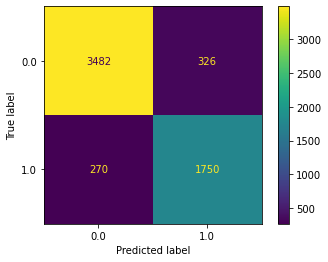

In [133]:
# Для наглядности построим график confusion matrix.
plot_confusion_matrix(ABC,X_test,y_test);

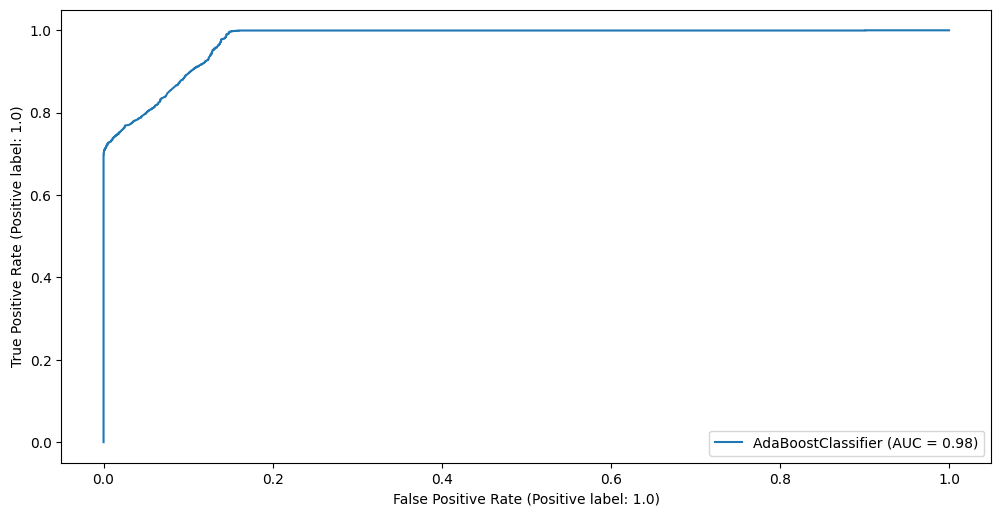

In [134]:
# Построим ROC кривую для рассматриваемой модели
fig,ax=plt.subplots(figsize=(12,6),dpi=100)
plot_roc_curve(ABC,X_test,y_test,ax=ax);

## Gradient Boost Classifier

In [135]:
# Классификаторы градиентного бустинга-это метод АдаБустинга в сочетании с взвешенной минимизацией, после чего классификаторы и 
# взвешенные входные данные пересчитываются. Цель классификаторов градиентного бустинга состоит в том, чтобы минимизировать 
# потери или разницу между фактическим значением класса обучающего примера и прогнозируемым значением класса. Не требуется 
# понимать процесс уменьшения потерь классификаторов, но он работает аналогично градиентному спуску в нейронной сети.
from sklearn.ensemble import GradientBoostingClassifier

In [136]:
# Создаем объект модели машинного обучения
GBC=GradientBoostingClassifier(random_state=101)
# Для тестирования модели с различными параметрами создаем список.
params={
    "n_estimators":[5,10,15],
    "learning_rate":[0.2,0.1],
    "max_depth":[3,4],
    "subsample":[0.3,0.6]
}

In [137]:
# При помощи GridSearchCV выполняем перебор всех сочетаний параметров.
grid_model=GridSearchCV(GBC,params,return_train_score=True,verbose=2)
# Запускаем подбор лучших сочетаний параметров при помощи GridSearchCV.fit, и передаем train данные.
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.3; total time=   2.7s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.3; total time=   2.7s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.3; total time=   2.5s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.3; total time=   2.5s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.3; total time=   2.6s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.6; total time=   5.7s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.6; total time=   5.8s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.6; total time=   5.8s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.6; total time=   5.7s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.6; total time=   5.1s
[CV] END learning_rate=0.2, 

[CV] END learning_rate=0.1, max_depth=3, n_estimators=15, subsample=0.6; total time=  14.8s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=5, subsample=0.3; total time=   2.9s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=5, subsample=0.3; total time=   2.9s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=5, subsample=0.3; total time=   2.9s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=5, subsample=0.3; total time=   2.9s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=5, subsample=0.3; total time=   2.8s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=5, subsample=0.6; total time=   6.2s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=5, subsample=0.6; total time=   6.2s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=5, subsample=0.6; total time=   6.2s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=5, subsample=0.6; total time=   6.2s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=5, subsample=0.6; total time=   6.2

GridSearchCV(estimator=GradientBoostingClassifier(random_state=101),
             param_grid={'learning_rate': [0.2, 0.1], 'max_depth': [3, 4],
                         'n_estimators': [5, 10, 15], 'subsample': [0.3, 0.6]},
             return_train_score=True, verbose=2)

In [138]:
# Рассмотрим основные результаты подбора параметров.
cv_results=pd.DataFrame(grid_model.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.695206      0.095558         0.007188        0.000404   
1       5.718831      0.257587         0.008398        0.001211   
2       5.099420      0.071435         0.007594        0.000487   
3      11.030971      0.257834         0.007408        0.000503   
4       7.897630      0.104477         0.009189        0.000982   

  param_learning_rate param_max_depth param_n_estimators param_subsample  \
0                 0.2               3                  5             0.3   
1                 0.2               3                  5             0.6   
2                 0.2               3                 10             0.3   
3                 0.2               3                 10             0.6   
4                 0.2               3                 15             0.3   

                                              params  split0_test_score  ...  \
0  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...           0.911067  ...   
1  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...           0.905633  ...   
2  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...           0.905061  ...   
3  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...           0.899628  ...   
4  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...           0.901916  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.904868        0.005264                5            0.908896   
1         0.904582        0.003138                6            0.909039   
2         0.902866        0.005425               13            0.912757   
3         0.901665        0.004957               15            0.915975   
4         0.900749        0.002740               17            0.915761   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.909403            0.908259            0.910905   
1            0.909188            0.909832            0.909617   
2            0.913336            0.909474            0.914480   
3            0.913908            0.913622            0.914909   
4            0.915910            0.916839            0.915981   

   split4_train_score  mean_train_score  std_train_score  
0            0.911834          0.909859         0.001318  
1            0.910690          0.909673         0.000583  
2            0.916625          0.913334         0.002340  
3            0.913908          0.914464         0.000873  
4            0.918341          0.916567         0.000964  

[5 rows x 24 columns]

Text(0, 0.5, 'Score')

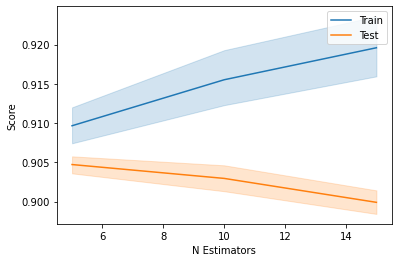

In [139]:
# Построим график зависимости параметра mean_score от param_n_estimators для обучающих и тестовых данных модели Gradient Boost Classifier.
sns.lineplot(data=cv_results,x="param_n_estimators",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_n_estimators",y="mean_test_score",label="Test")
plt.xlabel("N Estimators")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

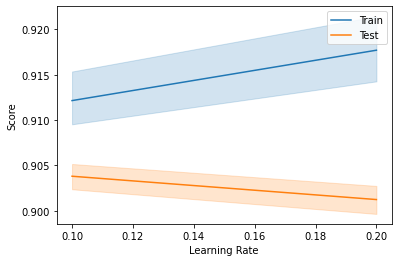

In [140]:
# Построим график зависимости параметра mean_score от param_learning_rate для обучающих и тестовых данных модели Gradient Boost Classifier.
sns.lineplot(data=cv_results,x="param_learning_rate",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_learning_rate",y="mean_test_score",label="Test")
plt.xlabel("Learning Rate")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

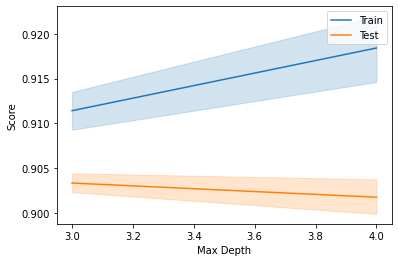

In [141]:
# Построим график зависимости параметра mean_score от param_max_depth для обучающих и тестовых данных модели Gradient Boost Classifier.
sns.lineplot(data=cv_results,x="param_max_depth",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_max_depth",y="mean_test_score",label="Test")
plt.xlabel("Max Depth")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

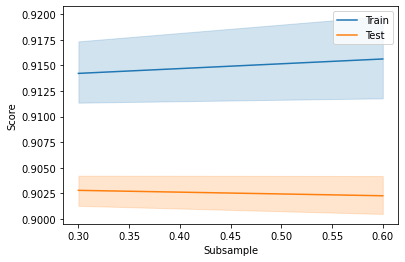

In [142]:
# Построим график зависимости параметра mean_score от param_subsample для обучающих и тестовых данных модели Gradient Boost Classifier.
sns.lineplot(data=cv_results,x="param_subsample",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_subsample",y="mean_test_score",label="Test")
plt.xlabel("Subsample")
plt.ylabel("Score")

In [143]:
# Определим лучшие параметры для модели Gradient Boost Classifier при помощи best_params_
grid_model.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 5, 'subsample': 0.3}

In [144]:
# Создадим модель Gradient Boost Classifier с лучшими параметрами и обучим ее на train данных.
BC=GradientBoostingClassifier(learning_rate=0.1,max_depth=4,n_estimators=5,subsample=0.3,random_state=101)
GBC.fit(X_train,y_train)

GradientBoostingClassifier(random_state=101)

In [145]:
# Выполним "предсказание" на обученной модели для test и train данных
y_pred=GBC.predict(X_test)
y_pred2=GBC.predict(X_train)

In [146]:
# Определим долю правильных "предсказаний" по отношению ко всем предсказаниям при помощи accuracy_score.
acc_GBC=accuracy_score(y_test,y_pred)
print("Train: ",accuracy_score(y_train,y_pred2))
print("Test: ",accuracy_score(y_test,y_pred))
# Как мы видим, для обучающих данных доля правильных предсказаний 90.75%, а для тестовых 90.41%.

Train:  0.9357016189005206
Test:  0.88761153054221


In [147]:
# Рассмотрим другие метрики качества модели
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.93      0.92      3808
         1.0       0.86      0.81      0.83      2020

    accuracy                           0.89      5828
   macro avg       0.88      0.87      0.87      5828
weighted avg       0.89      0.89      0.89      5828



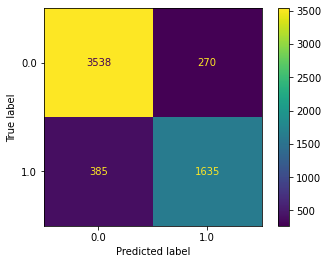

In [148]:
# Для наглядности построим график confusion matrix.
plot_confusion_matrix(GBC,X_test,y_test);

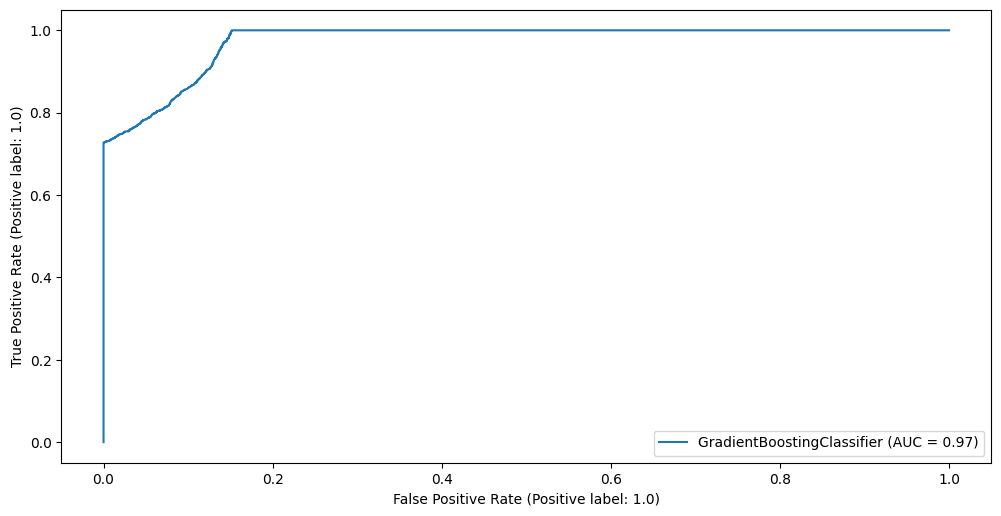

In [149]:
# Построим ROC кривую для рассматриваемой модели
fig,ax=plt.subplots(figsize=(12,6),dpi=100)
plot_roc_curve(GBC,X_test,y_test,ax=ax);

## XGBClassifier

In [150]:
# XGBoost-это усовершенствованная и настроенная версия системы дерева решений с градиентным повышением, созданная с учетом 
# производительности и скорости. XGBoost на самом деле означает “Экстремальный градиентный бустинг”, и это относится к тому факту,
# что алгоритмы и методы были настроены так, чтобы раздвинуть предел возможного для алгоритмов градиентного бустинга.
from xgboost import XGBClassifier

In [151]:
# Создаем объект модели машинного обучения
XGBC=XGBClassifier(random_state=101)
# Для тестирования модели с различными параметрами создаем список.
params={
    "n_estimators":[5,10,15],
    "learning_rate":[0.2,0.1],
    "max_depth":[3,4],
    "subsample":[0.3,0.6]
}

In [152]:
# При помощи GridSearchCV выполняем перебор всех сочетаний параметров.
grid_model=GridSearchCV(XGBC,params,return_train_score=True,verbose=2)
# Запускаем подбор лучших сочетаний параметров при помощи GridSearchCV.fit, и передаем train данные.
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[23:47:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.3; total time=   1.4s
[23:47:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.3; total time=   0.5s
[23:47:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the def

[CV] END learning_rate=0.2, max_depth=3, n_estimators=15, subsample=0.3; total time=   1.2s
[23:47:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.2, max_depth=3, n_estimators=15, subsample=0.3; total time=   1.2s
[23:47:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.2, max_depth=3, n_estimators=15, subsample=0.3; total time=   1.3s
[23:47:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: St

[CV] END learning_rate=0.2, max_depth=4, n_estimators=10, subsample=0.3; total time=   1.2s
[23:48:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.2, max_depth=4, n_estimators=10, subsample=0.3; total time=   1.1s
[23:48:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.2, max_depth=4, n_estimators=10, subsample=0.3; total time=   1.2s
[23:48:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: St

[CV] END learning_rate=0.1, max_depth=3, n_estimators=5, subsample=0.3; total time=   0.5s
[23:48:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.1, max_depth=3, n_estimators=5, subsample=0.3; total time=   0.5s
[23:48:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.1, max_depth=3, n_estimators=5, subsample=0.3; total time=   0.5s
[23:48:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Start

[CV] END learning_rate=0.1, max_depth=3, n_estimators=15, subsample=0.3; total time=   1.2s
[23:49:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.1, max_depth=3, n_estimators=15, subsample=0.3; total time=   1.3s
[23:49:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.1, max_depth=3, n_estimators=15, subsample=0.6; total time=   1.9s
[23:49:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: St

[CV] END learning_rate=0.1, max_depth=4, n_estimators=10, subsample=0.3; total time=   1.1s
[23:49:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.1, max_depth=4, n_estimators=10, subsample=0.6; total time=   1.7s
[23:49:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.1, max_depth=4, n_estimators=10, subsample=0.6; total time=   1.7s
[23:49:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: St

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=101, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
             

In [153]:
# Рассмотрим основные результаты подбора параметров.
cv_results=pd.DataFrame(grid_model.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.789192      0.357042         0.014245        0.003475   
1       0.871178      0.019675         0.012028        0.002688   
2       0.970425      0.024506         0.012093        0.002246   
3       1.436080      0.013562         0.010855        0.000982   
4       1.369682      0.050457         0.015485        0.005531   

  param_learning_rate param_max_depth param_n_estimators param_subsample  \
0                 0.2               3                  5             0.3   
1                 0.2               3                  5             0.6   
2                 0.2               3                 10             0.3   
3                 0.2               3                 10             0.6   
4                 0.2               3                 15             0.3   

                                              params  split0_test_score  ...  \
0  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...           0.898770  ...   
1  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...           0.896197  ...   
2  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...           0.901344  ...   
3  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...           0.899342  ...   
4  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...           0.901630  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.898232        0.003534               13            0.907537   
1         0.897718        0.003976               17            0.907680   
2         0.900978        0.003449                5            0.908896   
3         0.900521        0.003423                8            0.911971   
4         0.900692        0.003675                7            0.912328   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.909117            0.904684            0.909617   
1            0.911548            0.910619            0.911405   
2            0.911906            0.910332            0.914408   
3            0.913407            0.911977            0.912549   
4            0.914694            0.913121            0.915695   

   split4_train_score  mean_train_score  std_train_score  
0            0.905041          0.907199         0.002031  
1            0.908116          0.909874         0.001650  
2            0.913336          0.911776         0.001988  
3            0.913121          0.912605         0.000585  
4            0.914265          0.914021         0.001182  

[5 rows x 24 columns]

Text(0, 0.5, 'Score')

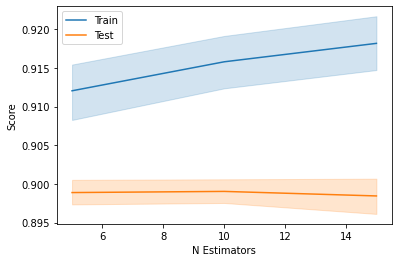

In [154]:
# Построим график зависимости параметра mean_score от param_n_estimators для обучающих и тестовых данных модели XGBClassifier.
sns.lineplot(data=cv_results,x="param_n_estimators",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_n_estimators",y="mean_test_score",label="Test")
plt.xlabel("N Estimators")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

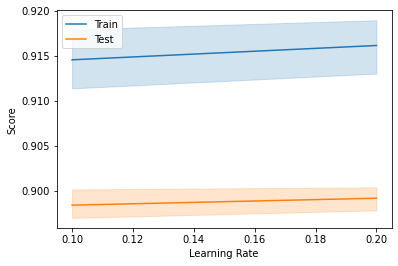

In [155]:
# Построим график зависимости параметра mean_score от param_learning_rate для обучающих и тестовых данных модели XGBClassifier.
sns.lineplot(data=cv_results,x="param_learning_rate",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_learning_rate",y="mean_test_score",label="Test")
plt.xlabel("Learning Rate")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

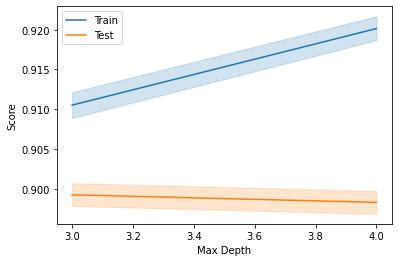

In [156]:
# Построим график зависимости параметра mean_score от param_max_depth для обучающих и тестовых данных модели XGBClassifier.
sns.lineplot(data=cv_results,x="param_max_depth",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_max_depth",y="mean_test_score",label="Test")
plt.xlabel("Max Depth")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

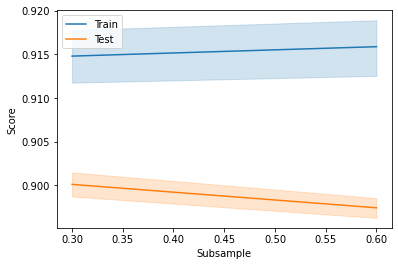

In [157]:
# Построим график зависимости параметра mean_score от param_subsample для обучающих и тестовых данных модели XGBClassifier.
sns.lineplot(data=cv_results,x="param_subsample",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_subsample",y="mean_test_score",label="Test")
plt.xlabel("Subsample")
plt.ylabel("Score")

In [158]:
# Определим лучшие параметры для модели XGBClassifier при помощи best_params_
grid_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 15, 'subsample': 0.3}

In [159]:
# Создадим модель XGBClassifier с лучшими параметрами и обучим ее на train данных.
XGBC=XGBClassifier(random_state=101,learning_rate=0.1,max_depth=3,n_estimators=15,subsample=0.3)
XGBC.fit(X_train,y_train)

[23:50:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=15, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=101,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.3,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [160]:
# Выполним "предсказание" на обученной модели для test и train данных
y_pred=XGBC.predict(X_test)
y_pred2=XGBC.predict(X_train)

In [161]:
# Определим долю правильных "предсказаний" по отношению ко всем предсказаниям при помощи accuracy_score.
acc_XGBC=accuracy_score(y_test,y_pred)
print("Train: ",accuracy_score(y_train,y_pred2))
print("Test: ",accuracy_score(y_test,y_pred))
# Как мы видим, для обучающих данных доля правильных предсказаний 90.94%, а для тестовых 90.49%.

Train:  0.9093873348206625
Test:  0.9051132463967055


In [162]:
# Рассмотрим другие метрики качества модели
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93      3808
         1.0       0.86      0.87      0.86      2020

    accuracy                           0.91      5828
   macro avg       0.89      0.90      0.90      5828
weighted avg       0.91      0.91      0.91      5828



* XGBoost handling imbalance even better. This model will never let you down. =]

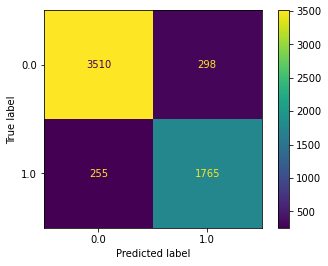

In [163]:
# Для наглядности построим график confusion matrix.
plot_confusion_matrix(XGBC,X_test,y_test);

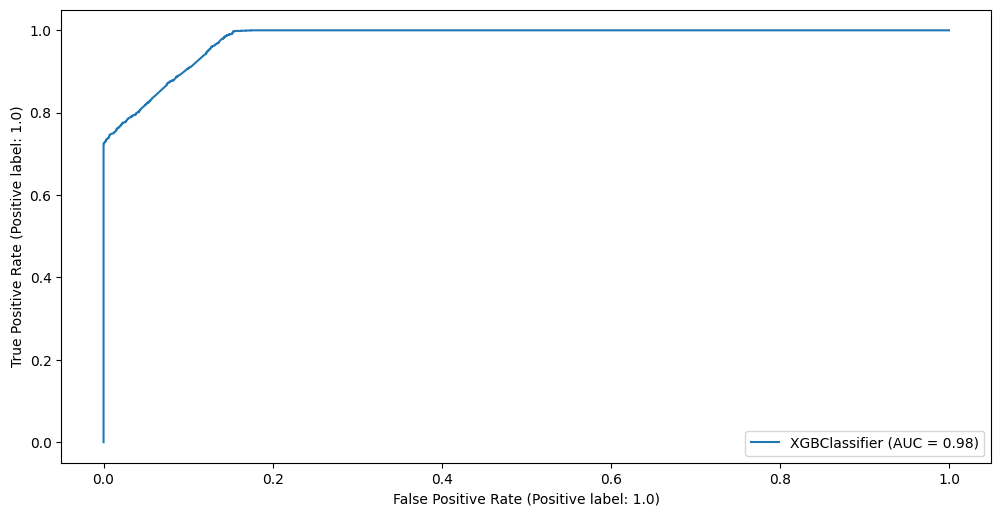

In [164]:
# Построим ROC кривую для рассматриваемой модели
fig,ax=plt.subplots(figsize=(12,6),dpi=100)
plot_roc_curve(XGBC,X_test,y_test,ax=ax);

## LGBMClassifier

In [165]:
# LightGBM расширяет алгоритм градиентного бустинга, добавляя тип автоматического выбора объектов, а также фокусируясь на 
# примерах бустинга с большими градиентами. Это может привести к резкому ускорению обучения и улучшению прогнозных показателей. 
# Таким образом, LightGBM стала де-факто алгоритмом для соревнований по машинному обучению при работе с табличными данными для 
# задач регрессионного и классификационного прогностического моделирования.
from lightgbm import LGBMClassifier

In [166]:
# Создаем объект модели машинного обучения
LGBMC= LGBMClassifier(random_state=101)
# Для тестирования модели с различными параметрами создаем список.
params={
    "n_estimators":[5,10,15,20],
    "learning_rate":[0.2,0.1,0.05],
    "max_depth":[3,4,8],
    "subsample":[0.3,0.6,0.9]
}

In [167]:
# При помощи GridSearchCV выполняем перебор всех сочетаний параметров.
grid_model=GridSearchCV(LGBMC,params,return_train_score=True,verbose=2)
# Запускаем подбор лучших сочетаний параметров при помощи GridSearchCV.fit, и передаем train данные.
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.3; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.3; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.3; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.3; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.3; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.2,

[CV] END learning_rate=0.2, max_depth=4, n_estimators=10, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=15, subsample=0.3; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=15, subsample=0.3; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=15, subsample=0.3; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=15, subsample=0.3; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=15, subsample=0.3; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=15, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=15, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=15, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=15, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=15, subsample=0.6; total t

[CV] END learning_rate=0.2, max_depth=8, n_estimators=20, subsample=0.9; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=5, subsample=0.3; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=5, subsample=0.3; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=5, subsample=0.3; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=5, subsample=0.3; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=5, subsample=0.3; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=5, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=5, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=5, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=5, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=5, subsample=0.6; total time=   0.4

[CV] END learning_rate=0.1, max_depth=4, n_estimators=10, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=15, subsample=0.3; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=15, subsample=0.3; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=15, subsample=0.3; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=15, subsample=0.3; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=15, subsample=0.3; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=15, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=15, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=15, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=15, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=15, subsample=0.6; total t

[CV] END learning_rate=0.1, max_depth=8, n_estimators=20, subsample=0.9; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=5, subsample=0.3; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=5, subsample=0.3; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=5, subsample=0.3; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=5, subsample=0.3; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=5, subsample=0.3; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=5, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=5, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=5, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=5, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=5, subsample=0.6; total t

[CV] END learning_rate=0.05, max_depth=4, n_estimators=10, subsample=0.9; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=4, n_estimators=10, subsample=0.9; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=4, n_estimators=15, subsample=0.3; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=4, n_estimators=15, subsample=0.3; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=4, n_estimators=15, subsample=0.3; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=4, n_estimators=15, subsample=0.3; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=4, n_estimators=15, subsample=0.3; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=4, n_estimators=15, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=4, n_estimators=15, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=4, n_estimators=15, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=4, n_estimators=15, subsample=0

[CV] END learning_rate=0.05, max_depth=8, n_estimators=20, subsample=0.9; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=8, n_estimators=20, subsample=0.9; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=8, n_estimators=20, subsample=0.9; total time=   0.7s


GridSearchCV(estimator=LGBMClassifier(random_state=101),
             param_grid={'learning_rate': [0.2, 0.1, 0.05],
                         'max_depth': [3, 4, 8],
                         'n_estimators': [5, 10, 15, 20],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, verbose=2)

In [168]:
# Рассмотрим основные результаты подбора параметров.
cv_results=pd.DataFrame(grid_model.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.504120      0.020424         0.002809        0.002941   
1       0.498200      0.017713         0.004431        0.003899   
2       0.501192      0.016299         0.004027        0.004222   
3       0.549480      0.019883         0.003019        0.002699   
4       0.557823      0.035367         0.002010        0.003111   

  param_learning_rate param_max_depth param_n_estimators param_subsample  \
0                 0.2               3                  5             0.3   
1                 0.2               3                  5             0.6   
2                 0.2               3                  5             0.9   
3                 0.2               3                 10             0.3   
4                 0.2               3                 10             0.6   

                                              params  split0_test_score  ...  \
0  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...           0.911067  ...   
1  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...           0.911067  ...   
2  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...           0.911067  ...   
3  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...           0.907635  ...   
4  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...           0.907635  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.907499        0.002982               19            0.908324   
1         0.907499        0.002982               19            0.908324   
2         0.907499        0.002982               19            0.908324   
3         0.905726        0.002401               46            0.910040   
4         0.905726        0.002401               46            0.910040   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.908831            0.908187            0.910046   
1            0.908831            0.908187            0.910046   
2            0.908831            0.908187            0.910046   
3            0.911906            0.909689            0.913407   
4            0.911906            0.909689            0.913407   

   split4_train_score  mean_train_score  std_train_score  
0            0.910118          0.909101         0.000829  
1            0.910118          0.909101         0.000829  
2            0.910118          0.909101         0.000829  
3            0.911262          0.911261         0.001340  
4            0.911262          0.911261         0.001340  

[5 rows x 24 columns]

Text(0, 0.5, 'Score')

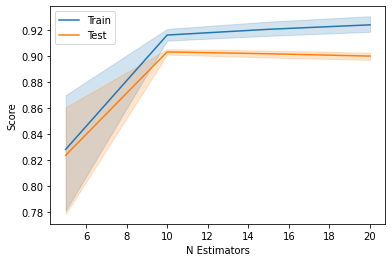

In [169]:
# Построим график зависимости параметра mean_score от param_n_estimators для обучающих и тестовых данных модели LGBMClassifier.
sns.lineplot(data=cv_results,x="param_n_estimators",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_n_estimators",y="mean_test_score",label="Test")
plt.xlabel("N Estimators")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

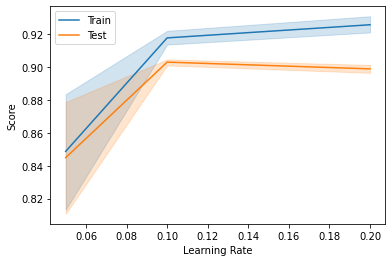

In [170]:
# Построим график зависимости параметра mean_score от param_learning_rate для обучающих и тестовых данных модели LGBMClassifier.
sns.lineplot(data=cv_results,x="param_learning_rate",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_learning_rate",y="mean_test_score",label="Test")
plt.xlabel("Learning Rate")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

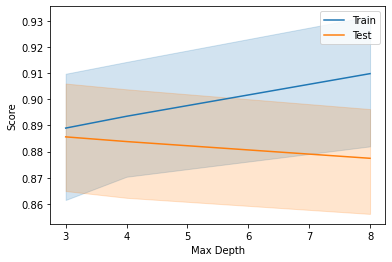

In [171]:
# Построим график зависимости параметра mean_score от param_max_depth для обучающих и тестовых данных модели LGBMClassifier.
sns.lineplot(data=cv_results,x="param_max_depth",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_max_depth",y="mean_test_score",label="Test")
plt.xlabel("Max Depth")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

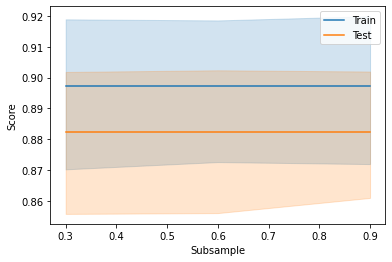

In [172]:
# Построим график зависимости параметра mean_score от param_subsample для обучающих и тестовых данных модели LGBMClassifier.
sns.lineplot(data=cv_results,x="param_subsample",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_subsample",y="mean_test_score",label="Test")
plt.xlabel("Subsample")
plt.ylabel("Score")

In [173]:
# Определим лучшие параметры для модели LGBMClassifier при помощи best_params_
grid_model.best_params_

{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 20, 'subsample': 0.3}

In [174]:
# Создадим модель LGBMClassifier с лучшими параметрами и обучим ее на train данных.
LGBMC=LGBMClassifier(random_state=101,learning_rate=0.05,max_depth=8,n_estimators=10,subsample=0.3)
LGBMC.fit(X_train,y_train)

LGBMClassifier(learning_rate=0.05, max_depth=8, n_estimators=10,
               random_state=101, subsample=0.3)

In [175]:
# Выполним "предсказание" на обученной модели для test и train данных
y_pred=LGBMC.predict(X_test)
y_pred2=LGBMC.predict(X_train)

In [176]:
# Определим долю правильных "предсказаний" по отношению ко всем предсказаниям при помощи accuracy_score.
acc_LGBMC=accuracy_score(y_test,y_pred)
print("Train: ",accuracy_score(y_train,y_pred2))
print("Test: ",accuracy_score(y_test,y_pred))
# Как мы видим, для обучающих данных доля правильных предсказаний 90.85%, а для тестовых 90.49%.

Train:  0.9083576454436245
Test:  0.9054564172958133


In [177]:
# Рассмотрим другие метрики качества модели
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      3808
         1.0       1.00      0.73      0.84      2020

    accuracy                           0.91      5828
   macro avg       0.94      0.86      0.89      5828
weighted avg       0.92      0.91      0.90      5828



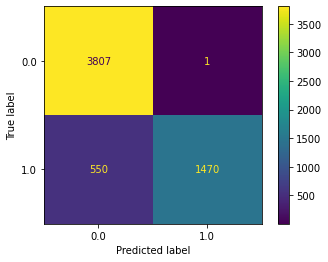

In [178]:
# Для наглядности построим график confusion matrix.
plot_confusion_matrix(LGBMC,X_test,y_test);

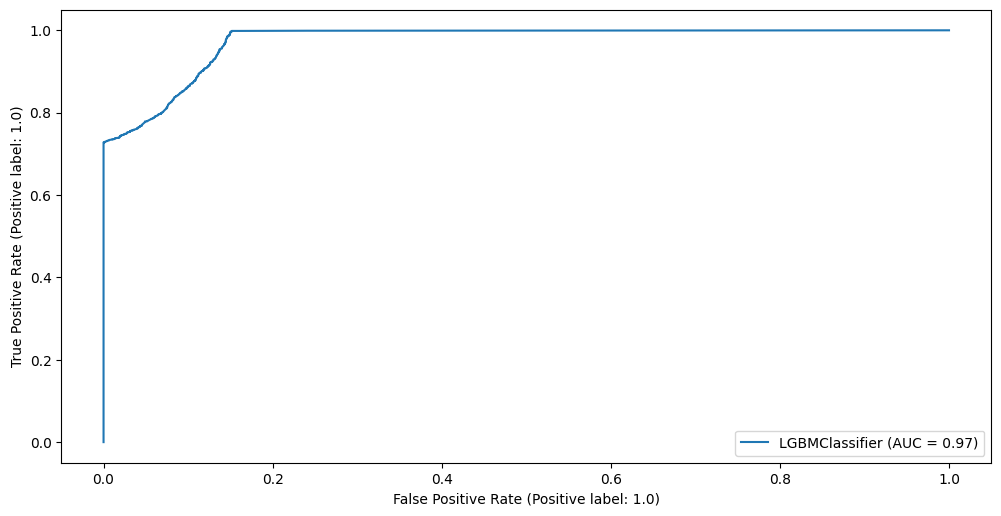

In [179]:
# Построим ROC кривую для рассматриваемой модели
fig,ax=plt.subplots(figsize=(12,6),dpi=100)
plot_roc_curve(LGBMC,X_test,y_test,ax=ax);

## Cat Boost Classifier

In [180]:
# CatBoost — это библиотека градиентного бустинга, созданная Яндексом. Она использует небрежные (oblivious) деревья решений, 
# чтобы вырастить сбалансированное дерево. Одни и те же функции используются для создания левых и правых разделений (split) на 
# каждом уровне дерева. По сравнению с классическими деревьями, небрежные деревья более эффективны при реализации на процессоре
# и просты в обучении.
from catboost import CatBoostClassifier

In [181]:
# Создаем объект модели машинного обучения
CBC=CatBoostClassifier(random_state=101)
# Для тестирования модели с различными параметрами создаем список.
params={
    "n_estimators":[5,10,15],
    "learning_rate":[0.2,0.1],
    "max_depth":[3,4],
    "subsample":[0.3,0.6]
}

In [182]:
# При помощи GridSearchCV выполняем перебор всех сочетаний параметров.
grid_model=GridSearchCV(CBC,params,return_train_score=True,verbose=2)
# Запускаем подбор лучших сочетаний параметров при помощи GridSearchCV.fit, и передаем train данные.
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
0:	learn: 0.4778057	total: 177ms	remaining: 709ms
1:	learn: 0.3659592	total: 193ms	remaining: 290ms
2:	learn: 0.2913585	total: 209ms	remaining: 139ms
3:	learn: 0.2395297	total: 224ms	remaining: 55.9ms
4:	learn: 0.2173428	total: 239ms	remaining: 0us
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.3; total time=   2.6s
0:	learn: 0.4391090	total: 18.7ms	remaining: 74.9ms
1:	learn: 0.3397729	total: 33.4ms	remaining: 50.2ms
2:	learn: 0.2749862	total: 48.4ms	remaining: 32.3ms
3:	learn: 0.2460446	total: 63.2ms	remaining: 15.8ms
4:	learn: 0.2105660	total: 78.1ms	remaining: 0us
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.3; total time=   2.1s
0:	learn: 0.4544228	total: 27.3ms	remaining: 109ms
1:	learn: 0.3225595	total: 42.8ms	remaining: 64.2ms
2:	learn: 0.2580482	total: 57.2ms	remaining: 38.1ms
3:	learn: 0.2314926	total: 71.1ms	remaining: 17.8ms
4:	learn: 0.2076056	total: 85.5ms	remaining

[CV] END learning_rate=0.2, max_depth=3, n_estimators=10, subsample=0.6; total time=   2.0s
0:	learn: 0.4430922	total: 17.8ms	remaining: 161ms
1:	learn: 0.3478910	total: 34ms	remaining: 136ms
2:	learn: 0.2633354	total: 51ms	remaining: 119ms
3:	learn: 0.2225631	total: 66.3ms	remaining: 99.4ms
4:	learn: 0.2027691	total: 83.2ms	remaining: 83.2ms
5:	learn: 0.1933591	total: 99.4ms	remaining: 66.2ms
6:	learn: 0.1857047	total: 115ms	remaining: 49.4ms
7:	learn: 0.1790847	total: 132ms	remaining: 32.9ms
8:	learn: 0.1684965	total: 148ms	remaining: 16.4ms
9:	learn: 0.1626886	total: 163ms	remaining: 0us
[CV] END learning_rate=0.2, max_depth=3, n_estimators=10, subsample=0.6; total time=   2.1s
0:	learn: 0.4573134	total: 18.1ms	remaining: 163ms
1:	learn: 0.3397609	total: 35.2ms	remaining: 141ms
2:	learn: 0.2713837	total: 50.9ms	remaining: 119ms
3:	learn: 0.2263903	total: 66.9ms	remaining: 100ms
4:	learn: 0.1945519	total: 82.7ms	remaining: 82.7ms
5:	learn: 0.1780082	total: 98.3ms	remaining: 65.5ms
6:

12:	learn: 0.1562381	total: 212ms	remaining: 32.6ms
13:	learn: 0.1549751	total: 227ms	remaining: 16.2ms
14:	learn: 0.1528650	total: 243ms	remaining: 0us
[CV] END learning_rate=0.2, max_depth=3, n_estimators=15, subsample=0.6; total time=   2.3s
0:	learn: 0.4573134	total: 17.8ms	remaining: 249ms
1:	learn: 0.3397609	total: 34.8ms	remaining: 226ms
2:	learn: 0.2713837	total: 51.3ms	remaining: 205ms
3:	learn: 0.2263903	total: 66.9ms	remaining: 184ms
4:	learn: 0.1945519	total: 82.2ms	remaining: 164ms
5:	learn: 0.1780082	total: 97.7ms	remaining: 147ms
6:	learn: 0.1708647	total: 114ms	remaining: 130ms
7:	learn: 0.1682106	total: 129ms	remaining: 113ms
8:	learn: 0.1654123	total: 145ms	remaining: 96.4ms
9:	learn: 0.1634541	total: 159ms	remaining: 79.7ms
10:	learn: 0.1621176	total: 174ms	remaining: 63.4ms
11:	learn: 0.1610337	total: 190ms	remaining: 47.4ms
12:	learn: 0.1591595	total: 205ms	remaining: 31.5ms
13:	learn: 0.1568055	total: 222ms	remaining: 15.9ms
14:	learn: 0.1559233	total: 237ms	remai

9:	learn: 0.1564345	total: 248ms	remaining: 0us
[CV] END learning_rate=0.2, max_depth=4, n_estimators=10, subsample=0.6; total time=   2.2s
0:	learn: 0.4515801	total: 29.5ms	remaining: 265ms
1:	learn: 0.2781053	total: 70.9ms	remaining: 284ms
2:	learn: 0.2363090	total: 103ms	remaining: 239ms
3:	learn: 0.2131502	total: 128ms	remaining: 193ms
4:	learn: 0.1971728	total: 153ms	remaining: 153ms
5:	learn: 0.1832191	total: 178ms	remaining: 119ms
6:	learn: 0.1675850	total: 204ms	remaining: 87.6ms
7:	learn: 0.1639704	total: 229ms	remaining: 57.3ms
8:	learn: 0.1622299	total: 258ms	remaining: 28.7ms
9:	learn: 0.1600389	total: 284ms	remaining: 0us
[CV] END learning_rate=0.2, max_depth=4, n_estimators=10, subsample=0.6; total time=   2.5s
0:	learn: 0.4375080	total: 29.8ms	remaining: 269ms
1:	learn: 0.2681183	total: 57.6ms	remaining: 230ms
2:	learn: 0.2168471	total: 83.2ms	remaining: 194ms
3:	learn: 0.2006679	total: 109ms	remaining: 164ms
4:	learn: 0.1871639	total: 135ms	remaining: 135ms
5:	learn: 0.

9:	learn: 0.1600389	total: 249ms	remaining: 124ms
10:	learn: 0.1572339	total: 272ms	remaining: 99ms
11:	learn: 0.1556721	total: 296ms	remaining: 74ms
12:	learn: 0.1545145	total: 319ms	remaining: 49.1ms
13:	learn: 0.1528398	total: 343ms	remaining: 24.5ms
14:	learn: 0.1501932	total: 368ms	remaining: 0us
[CV] END learning_rate=0.2, max_depth=4, n_estimators=15, subsample=0.6; total time=   2.7s
0:	learn: 0.4375080	total: 27.6ms	remaining: 386ms
1:	learn: 0.2681183	total: 52.9ms	remaining: 344ms
2:	learn: 0.2168471	total: 76.6ms	remaining: 306ms
3:	learn: 0.2006679	total: 100ms	remaining: 276ms
4:	learn: 0.1871639	total: 124ms	remaining: 249ms
5:	learn: 0.1749979	total: 148ms	remaining: 222ms
6:	learn: 0.1676592	total: 172ms	remaining: 197ms
7:	learn: 0.1595181	total: 197ms	remaining: 172ms
8:	learn: 0.1565812	total: 221ms	remaining: 147ms
9:	learn: 0.1548614	total: 245ms	remaining: 123ms
10:	learn: 0.1519795	total: 270ms	remaining: 98.3ms
11:	learn: 0.1507838	total: 293ms	remaining: 73.3m

[CV] END learning_rate=0.1, max_depth=3, n_estimators=10, subsample=0.3; total time=   2.1s
0:	learn: 0.5534453	total: 24.4ms	remaining: 220ms
1:	learn: 0.4767874	total: 51.1ms	remaining: 204ms
2:	learn: 0.4044138	total: 73ms	remaining: 170ms
3:	learn: 0.3590180	total: 93.8ms	remaining: 141ms
4:	learn: 0.3235923	total: 115ms	remaining: 115ms
5:	learn: 0.2845424	total: 131ms	remaining: 87.6ms
6:	learn: 0.2640706	total: 147ms	remaining: 63.1ms
7:	learn: 0.2499270	total: 164ms	remaining: 40.9ms
8:	learn: 0.2279878	total: 180ms	remaining: 20ms
9:	learn: 0.2100301	total: 196ms	remaining: 0us
[CV] END learning_rate=0.1, max_depth=3, n_estimators=10, subsample=0.6; total time=   2.1s
0:	learn: 0.5475279	total: 18.2ms	remaining: 164ms
1:	learn: 0.4618870	total: 36.7ms	remaining: 147ms
2:	learn: 0.4087160	total: 53ms	remaining: 124ms
3:	learn: 0.3641559	total: 70.3ms	remaining: 106ms
4:	learn: 0.3118824	total: 87ms	remaining: 87ms
5:	learn: 0.2686502	total: 105ms	remaining: 69.8ms
6:	learn: 0.2

0:	learn: 0.5475279	total: 18.6ms	remaining: 260ms
1:	learn: 0.4618870	total: 36.1ms	remaining: 235ms
2:	learn: 0.4087160	total: 52.6ms	remaining: 211ms
3:	learn: 0.3641559	total: 69.2ms	remaining: 190ms
4:	learn: 0.3118824	total: 86.6ms	remaining: 173ms
5:	learn: 0.2686502	total: 105ms	remaining: 158ms
6:	learn: 0.2423022	total: 123ms	remaining: 140ms
7:	learn: 0.2284282	total: 140ms	remaining: 123ms
8:	learn: 0.2190181	total: 158ms	remaining: 105ms
9:	learn: 0.2051358	total: 177ms	remaining: 88.3ms
10:	learn: 0.1929799	total: 193ms	remaining: 70.3ms
11:	learn: 0.1887861	total: 210ms	remaining: 52.6ms
12:	learn: 0.1852524	total: 229ms	remaining: 35.2ms
13:	learn: 0.1807857	total: 246ms	remaining: 17.6ms
14:	learn: 0.1774037	total: 265ms	remaining: 0us
[CV] END learning_rate=0.1, max_depth=3, n_estimators=15, subsample=0.6; total time=   2.6s
0:	learn: 0.5580179	total: 23.3ms	remaining: 326ms
1:	learn: 0.4726838	total: 45.4ms	remaining: 295ms
2:	learn: 0.3884667	total: 67.1ms	remaining

[CV] END learning_rate=0.1, max_depth=4, n_estimators=10, subsample=0.3; total time=   2.4s
0:	learn: 0.5683547	total: 28.2ms	remaining: 254ms
1:	learn: 0.4776077	total: 53.8ms	remaining: 215ms
2:	learn: 0.3490964	total: 79.2ms	remaining: 185ms
3:	learn: 0.3003899	total: 104ms	remaining: 156ms
4:	learn: 0.2601625	total: 129ms	remaining: 129ms
5:	learn: 0.2388906	total: 152ms	remaining: 102ms
6:	learn: 0.2224488	total: 176ms	remaining: 75.5ms
7:	learn: 0.2066496	total: 200ms	remaining: 49.9ms
8:	learn: 0.1904381	total: 223ms	remaining: 24.8ms
9:	learn: 0.1860873	total: 248ms	remaining: 0us
[CV] END learning_rate=0.1, max_depth=4, n_estimators=10, subsample=0.3; total time=   2.3s
0:	learn: 0.5707267	total: 30.1ms	remaining: 271ms
1:	learn: 0.4885785	total: 57.5ms	remaining: 230ms
2:	learn: 0.3713988	total: 84.2ms	remaining: 197ms
3:	learn: 0.3126595	total: 111ms	remaining: 166ms
4:	learn: 0.2804322	total: 137ms	remaining: 137ms
5:	learn: 0.2555463	total: 164ms	remaining: 110ms
6:	learn:

[CV] END learning_rate=0.1, max_depth=4, n_estimators=15, subsample=0.3; total time=   2.4s
0:	learn: 0.5482493	total: 27.7ms	remaining: 388ms
1:	learn: 0.4027254	total: 53.4ms	remaining: 347ms
2:	learn: 0.3313475	total: 78.2ms	remaining: 313ms
3:	learn: 0.2876588	total: 106ms	remaining: 292ms
4:	learn: 0.2605745	total: 135ms	remaining: 270ms
5:	learn: 0.2401295	total: 161ms	remaining: 241ms
6:	learn: 0.2231414	total: 186ms	remaining: 213ms
7:	learn: 0.2081340	total: 211ms	remaining: 184ms
8:	learn: 0.2003308	total: 236ms	remaining: 157ms
9:	learn: 0.1883644	total: 260ms	remaining: 130ms
10:	learn: 0.1812879	total: 284ms	remaining: 103ms
11:	learn: 0.1776978	total: 308ms	remaining: 76.9ms
12:	learn: 0.1751059	total: 338ms	remaining: 52.1ms
13:	learn: 0.1723734	total: 365ms	remaining: 26ms
14:	learn: 0.1693624	total: 391ms	remaining: 0us
[CV] END learning_rate=0.1, max_depth=4, n_estimators=15, subsample=0.6; total time=   2.6s
0:	learn: 0.5431944	total: 31.7ms	remaining: 443ms
1:	learn

GridSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x000002A8392076D0>,
             param_grid={'learning_rate': [0.2, 0.1], 'max_depth': [3, 4],
                         'n_estimators': [5, 10, 15], 'subsample': [0.3, 0.6]},
             return_train_score=True, verbose=2)

In [183]:
# Рассмотрим основные результаты подбора параметров.
cv_results=pd.DataFrame(grid_model.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.984640      0.210444         0.317364        0.014633   
1       1.785133      0.054435         0.302960        0.008546   
2       1.925488      0.166715         0.303491        0.006238   
3       1.880757      0.040071         0.300602        0.000349   
4       2.048491      0.164317         0.300044        0.010858   

  param_learning_rate param_max_depth param_n_estimators param_subsample  \
0                 0.2               3                  5             0.3   
1                 0.2               3                  5             0.6   
2                 0.2               3                 10             0.3   
3                 0.2               3                 10             0.6   
4                 0.2               3                 15             0.3   

                                              params  split0_test_score  ...  \
0  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...           0.907921  ...   
1  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...           0.907921  ...   
2  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...           0.911067  ...   
3  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...           0.909351  ...   
4  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...           0.910781  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.902866        0.003361               19            0.903676   
1         0.902008        0.003853               20            0.905463   
2         0.904582        0.003789                9            0.907108   
3         0.903094        0.003801               18            0.907537   
4         0.905268        0.004410                5            0.908252   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.906114            0.903540            0.905542   
1            0.908187            0.905256            0.907687   
2            0.907115            0.905399            0.904827   
3            0.907401            0.907472            0.907401   
4            0.908187            0.905971            0.909117   

   split4_train_score  mean_train_score  std_train_score  
0            0.903683          0.904511         0.001092  
1            0.906686          0.906656         0.001165  
2            0.907043          0.906298         0.000985  
3            0.906614          0.907285         0.000339  
4            0.908831          0.908072         0.001107  

[5 rows x 24 columns]

Text(0, 0.5, 'Score')

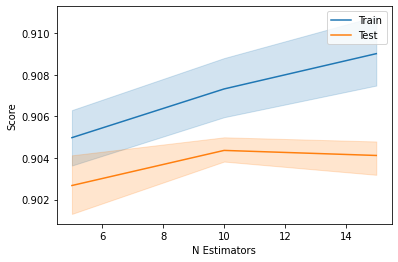

In [184]:
# Построим график зависимости параметра mean_score от param_n_estimators для обучающих и тестовых данных модели Cat Boost Classifier.
sns.lineplot(data=cv_results,x="param_n_estimators",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_n_estimators",y="mean_test_score",label="Test")
plt.xlabel("N Estimators")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

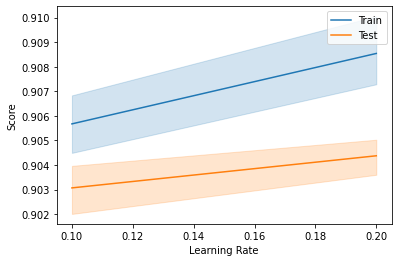

In [185]:
# Построим график зависимости параметра mean_score от param_learning_rate для обучающих и тестовых данных модели Cat Boost Classifier.
sns.lineplot(data=cv_results,x="param_learning_rate",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_learning_rate",y="mean_test_score",label="Test")
plt.xlabel("Learning Rate")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

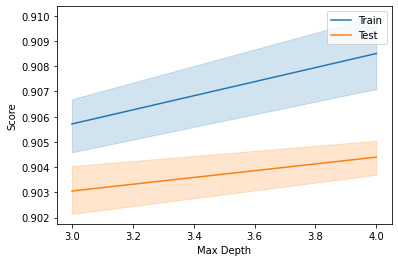

In [186]:
# Построим график зависимости параметра mean_score от param_max_depth для обучающих и тестовых данных модели Cat Boost Classifier.
sns.lineplot(data=cv_results,x="param_max_depth",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_max_depth",y="mean_test_score",label="Test")
plt.xlabel("Max Depth")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

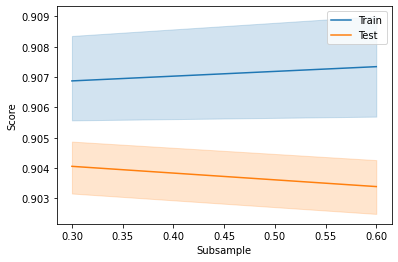

In [187]:
# Построим график зависимости параметра mean_score от param_subsample для обучающих и тестовых данных модели Cat Boost Classifier.
sns.lineplot(data=cv_results,x="param_subsample",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_subsample",y="mean_test_score",label="Test")
plt.xlabel("Subsample")
plt.ylabel("Score")

In [188]:
# Определим лучшие параметры для модели Cat Boost Classifier при помощи best_params_
grid_model.best_params_

{'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 10, 'subsample': 0.3}

In [189]:
# Создадим модель Cat Boost Classifier с лучшими параметрами и обучим ее на train данных.
CBC=CatBoostClassifier(random_state=101,learning_rate=0.2,max_depth=4,n_estimators=5,subsample=0.6)
CBC.fit(X_train,y_train)


0:	learn: 0.4314632	total: 29.1ms	remaining: 116ms
1:	learn: 0.2683279	total: 56.7ms	remaining: 85ms
2:	learn: 0.2249861	total: 83.1ms	remaining: 55.4ms
3:	learn: 0.1990473	total: 108ms	remaining: 27ms
4:	learn: 0.1831884	total: 134ms	remaining: 0us


In [190]:
# Выполним "предсказание" на обученной модели для test и train данных
y_pred=CBC.predict(X_test)
y_pred2=CBC.predict(X_train)

In [191]:
# Определим долю правильных "предсказаний" по отношению ко всем предсказаниям при помощи accuracy_score.
acc_CBC=accuracy_score(y_test,y_pred)
print("Train: ",accuracy_score(y_train,y_pred2))
print("Test: ",accuracy_score(y_test,y_pred))
# Как мы видим, для обучающих данных доля правильных предсказаний 90.81%, а для тестовых 90.36%.

Train:  0.9081288255820605
Test:  0.9035689773507206


In [192]:
# Рассмотрим другие метрики качества модели
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93      3808
         1.0       0.91      0.80      0.85      2020

    accuracy                           0.90      5828
   macro avg       0.91      0.88      0.89      5828
weighted avg       0.90      0.90      0.90      5828



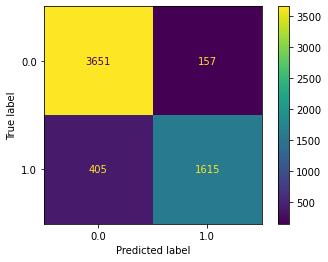

In [193]:
# Для наглядности построим график confusion matrix.
plot_confusion_matrix(CBC,X_test,y_test);

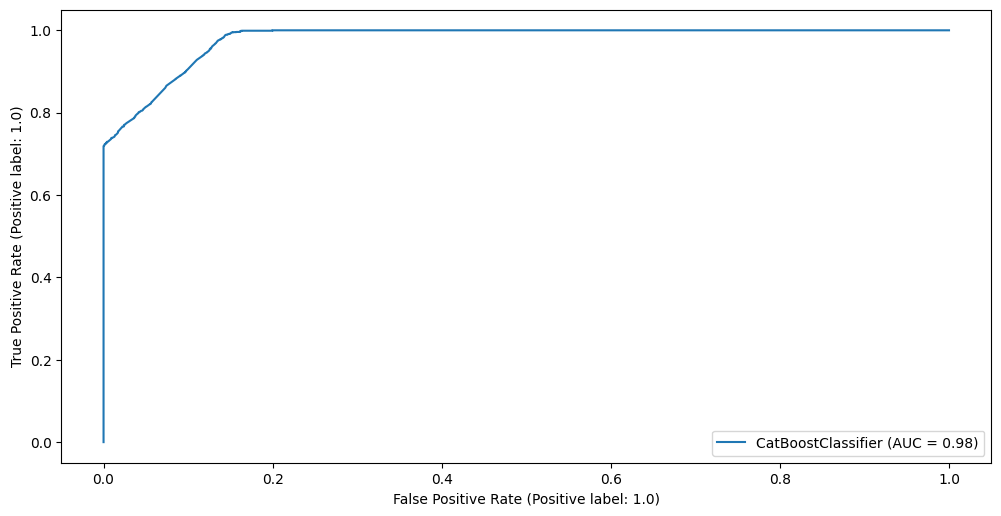

In [194]:
# Построим ROC кривую для рассматриваемой модели
fig,ax=plt.subplots(figsize=(12,6),dpi=100)
plot_roc_curve(CBC,X_test,y_test,ax=ax);

## Bernoulli NB

In [195]:
# Bernoulli Naive Bayes — это вариант наивного байесовского (Naive Bayes)  метода. Наивный Байес — это алгоритм классификации 
# машинного обучения, основанный на теореме Байеса, которая дает вероятность возникновения события. Наивный байесовский 
# классификатор — это вероятностный классификатор, который означает, что при наличии входных данных он предсказывает вероятность
# того, что входные данные будут классифицированы для всех классов. Ее также называют условной вероятностью.
# Для наивного байесовского классификатора сделаны два важных предположения:
# Во-первых, атрибуты независимы друг от друга и не влияют на производительность друг друга, поэтому его называют «наивным».
# Во-вторых, всем функциям придается одинаковое значение. Например, если есть 10 функций, знание только 5 функций не даст нам 
# точного результата. Все функции необходимы для прогнозирования результата и имеют одинаковую важность.
from sklearn.naive_bayes import BernoulliNB
# Теорема Байеса:
display(Image(url='https://iq.opengenus.org/content/images/2020/05/naive-1.png', width = 500))

In [196]:
# Существует три типа наивных байесовских классификаторов:
# Мультиномиальный наивный байесовский классификатор — широко используемый классификатор для классификации документов, который 
# ведет подсчет часто встречающихся слов в документах.
# Наивный байесовский алгоритм Бернулли — используется для дискретных данных, где функции представлены только в двоичной форме.
# Gaussian Naive Bayes — используется, когда мы имеем дело с непрерывными данными и используем распределение Гаусса.

In [197]:
# Создаем объект модели машинного обучения
BNB=BernoulliNB()
# Обучим ее на train данных
BNB.fit(X_train,y_train)

BernoulliNB()

In [198]:
# Выполним "предсказание" на обученной модели для test и train данных
y_pred=BNB.predict(X_test)
y_pred2=BNB.predict(X_train)

In [199]:
# Определим долю правильных "предсказаний" по отношению ко всем предсказаниям при помощи accuracy_score.
acc_BNB=accuracy_score(y_test,y_pred)
print("Train: ",accuracy_score(y_train,y_pred2))
print("Test: ",accuracy_score(y_test,y_pred))
# Как мы видим, для обучающих данных доля правильных предсказаний 86.88%, а для тестовых 86.14%.

Train:  0.8698014987700933
Test:  0.8644474948524365


In [200]:
# Рассмотрим другие метрики качества модели
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      3808
         1.0       0.87      0.72      0.79      2020

    accuracy                           0.86      5828
   macro avg       0.87      0.83      0.84      5828
weighted avg       0.86      0.86      0.86      5828



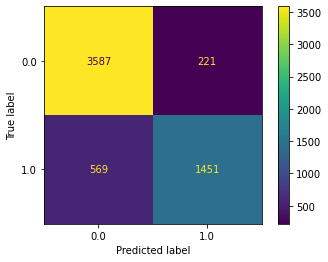

In [201]:
# Для наглядности построим график confusion matrix.
plot_confusion_matrix(BNB,X_test,y_test);

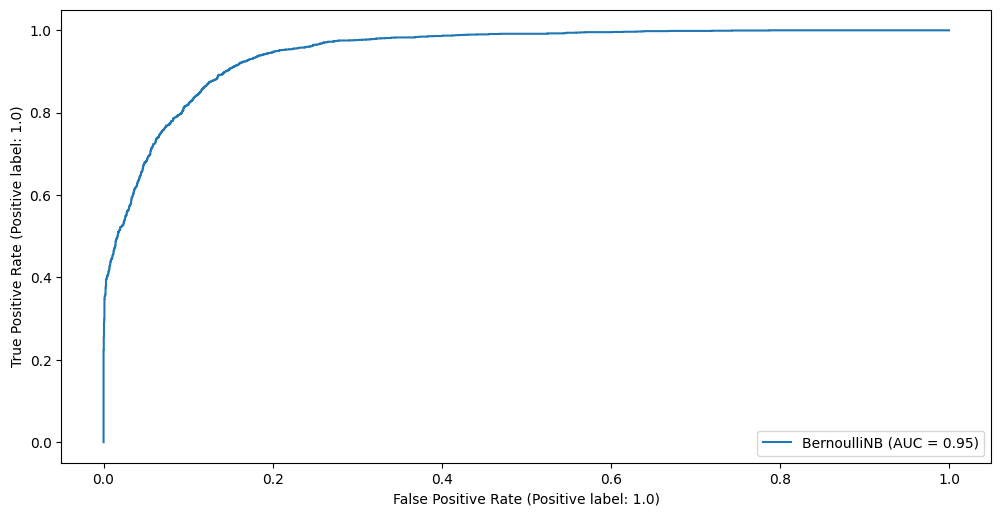

In [202]:
# Построим ROC кривую для рассматриваемой модели
fig,ax=plt.subplots(figsize=(12,6),dpi=100)
plot_roc_curve(BNB,X_test,y_test,ax=ax);

## SGDClassifier

In [203]:
# Стохастический градиентный спуск (SGD) - это простой, но очень эффективный метод, который в основном используется для 
# дискриминативного обучения линейных классификаторов при выпуклых функциях потерь, таких как (линейные) опорные векторные 
# машины и логистическая регрессия.
from sklearn.linear_model import SGDClassifier

In [204]:
# Создаем объект модели машинного обучения
SGDC=SGDClassifier(random_state=101)
# Для тестирования модели с различными параметрами создаем список.
params={"alpha":[0.0001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
        "l1_ratio": [0.1, 0.5,1]}

In [205]:
# При помощи GridSearchCV выполняем перебор всех сочетаний параметров.
grid_model=GridSearchCV(SGDC,params,return_train_score=True,verbose=2)
# Запускаем подбор лучших сочетаний параметров при помощи GridSearchCV.fit, и передаем train данные.
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 39 candidates, totalling 195 fits
[CV] END .........................alpha=0.0001, l1_ratio=0.1; total time=   0.8s
[CV] END .........................alpha=0.0001, l1_ratio=0.1; total time=   1.4s
[CV] END .........................alpha=0.0001, l1_ratio=0.1; total time=   1.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.1; total time=   1.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.1; total time=   0.8s
[CV] END .........................alpha=0.0001, l1_ratio=0.5; total time=   0.8s
[CV] END .........................alpha=0.0001, l1_ratio=0.5; total time=   1.4s
[CV] END .........................alpha=0.0001, l1_ratio=0.5; total time=   1.1s
[CV] END .........................alpha=0.0001, l1_ratio=0.5; total time=   1.0s
[CV] END .........................alpha=0.0001, l1_ratio=0.5; total time=   0.8s
[CV] END ...........................alpha=0.0001, l1_ratio=1; total time=   0.8s
[CV] END ...........................alpha=0.000

[CV] END ..............................alpha=0.4, l1_ratio=1; total time=   0.1s
[CV] END ..............................alpha=0.4, l1_ratio=1; total time=   0.1s
[CV] END ..............................alpha=0.4, l1_ratio=1; total time=   0.1s
[CV] END ..............................alpha=0.4, l1_ratio=1; total time=   0.1s
[CV] END ............................alpha=0.5, l1_ratio=0.1; total time=   0.1s
[CV] END ............................alpha=0.5, l1_ratio=0.1; total time=   0.1s
[CV] END ............................alpha=0.5, l1_ratio=0.1; total time=   0.1s
[CV] END ............................alpha=0.5, l1_ratio=0.1; total time=   0.1s
[CV] END ............................alpha=0.5, l1_ratio=0.1; total time=   0.1s
[CV] END ............................alpha=0.5, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.5; total time=   0.1s
[CV] END ............................alpha=0.5, l1_ratio=0.5; total time=   0.1s
[CV] END ...................

GridSearchCV(estimator=SGDClassifier(random_state=101),
             param_grid={'alpha': [0.0001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0],
                         'l1_ratio': [0.1, 0.5, 1]},
             return_train_score=True, verbose=2)

In [206]:
# Рассмотрим основные результаты подбора параметров.
cv_results=pd.DataFrame(grid_model.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       1.091216      0.208483         0.006241        0.007644      0.0001   
1       1.091733      0.223168         0.007064        0.007171      0.0001   
2       1.079577      0.190058         0.006251        0.007656      0.0001   
3       0.641097      0.086201         0.000000        0.000000        0.01   
4       0.650111      0.076924         0.000000        0.000000        0.01   

  param_l1_ratio                              params  split0_test_score  \
0            0.1  {'alpha': 0.0001, 'l1_ratio': 0.1}           0.899914   
1            0.5  {'alpha': 0.0001, 'l1_ratio': 0.5}           0.899914   
2              1    {'alpha': 0.0001, 'l1_ratio': 1}           0.899914   
3            0.1    {'alpha': 0.01, 'l1_ratio': 0.1}           0.902202   
4            0.5    {'alpha': 0.01, 'l1_ratio': 0.5}           0.902202   

   split1_test_score  split2_test_score  ...  mean_test_score  std_test_score  \
0           0.900744           0.910183  ...         0.901550        0.004537   
1           0.900744           0.910183  ...         0.901550        0.004537   
2           0.900744           0.910183  ...         0.901550        0.004537   
3           0.896453           0.905892  ...         0.901035        0.003078   
4           0.896453           0.905892  ...         0.901035        0.003078   

   rank_test_score  split0_train_score  split1_train_score  \
0               28            0.912972            0.915981   
1               28            0.912972            0.915981   
2               28            0.912972            0.915981   
3               31            0.914903            0.918270   
4               31            0.914903            0.918270   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.912049            0.914909            0.914980   
1            0.912049            0.914909            0.914980   
2            0.912049            0.914909            0.914980   
3            0.916625            0.916625            0.920558   
4            0.916625            0.916625            0.920558   

   mean_train_score  std_train_score  
0          0.914178         0.001444  
1          0.914178         0.001444  
2          0.914178         0.001444  
3          0.917396         0.001906  
4          0.917396         0.001906  

[5 rows x 22 columns]

Text(0, 0.5, 'Score')

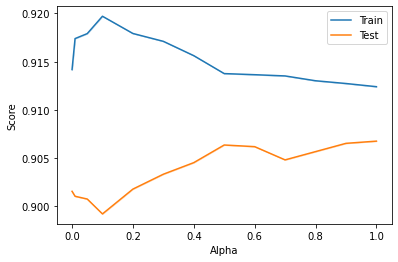

In [207]:
# Построим график зависимости параметра mean_score от param_alpha для обучающих и тестовых данных модели SGDClassifier.
sns.lineplot(data=cv_results,x="param_alpha",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_alpha",y="mean_test_score",label="Test")
plt.xlabel("Alpha")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

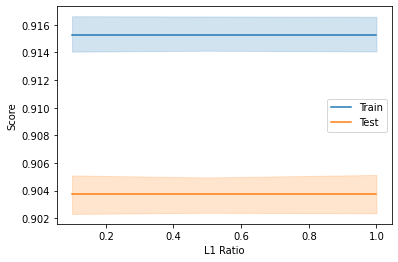

In [208]:
# Построим график зависимости параметра mean_score от param_l1_ratio для обучающих и тестовых данных модели SGDClassifier.
sns.lineplot(data=cv_results,x="param_l1_ratio",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_l1_ratio",y="mean_test_score",label="Test")
plt.xlabel("L1 Ratio")
plt.ylabel("Score")

In [209]:
# Определим лучшие параметры для модели SGDClassifier при помощи best_params_
grid_model.best_params_

{'alpha': 1.0, 'l1_ratio': 0.1}

In [210]:
# Создадим модель SGDClassifier с лучшими параметрами и обучим ее на train данных.
SGDC=SGDClassifier(random_state=101,alpha=1.0,l1_ratio=0.1)
SGDC.fit(X_train,y_train)

SGDClassifier(alpha=1.0, l1_ratio=0.1, random_state=101)

In [211]:
# Выполним "предсказание" на обученной модели для test и train данных
y_pred=SGDC.predict(X_test)
y_pred2=SGDC.predict(X_train)

In [212]:
# Определим долю правильных "предсказаний" по отношению ко всем предсказаниям при помощи accuracy_score.
acc_SGDC=accuracy_score(y_test,y_pred)
print("Train: ",accuracy_score(y_train,y_pred2))
print("Test: ",accuracy_score(y_test,y_pred))
# Как мы видим, для обучающих данных доля правильных предсказаний 91.15%, а для тестовых 90.31%.

Train:  0.9117327384016932
Test:  0.9020247083047358


In [213]:
# Рассмотрим другие метрики качества модели
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.90      0.92      3808
         1.0       0.83      0.91      0.87      2020

    accuracy                           0.90      5828
   macro avg       0.89      0.90      0.89      5828
weighted avg       0.91      0.90      0.90      5828



* We see here that SGDC knocked it out of the park. The handling of the little imbalance in the data dont even affected the model

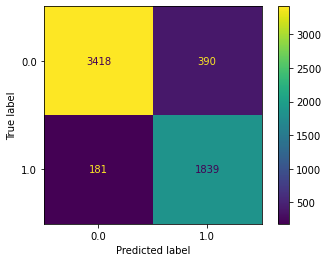

In [214]:
# Для наглядности построим график confusion matrix.
plot_confusion_matrix(SGDC,X_test,y_test);

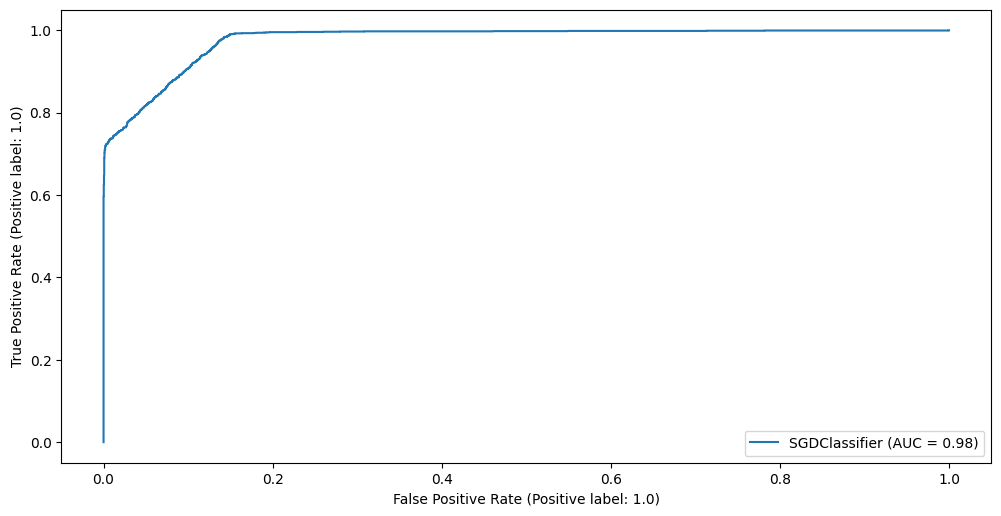

In [215]:
# Построим ROC кривую для рассматриваемой модели
fig,ax=plt.subplots(figsize=(12,6),dpi=100)
plot_roc_curve(SGDC,X_test,y_test,ax=ax);

## Voting Classifier

In [216]:
# Идея VotingClassifier состоит в том, чтобы объединить концептуально разные классификаторы машинного обучения и использовать 
# большинство голосов или средние прогнозируемые вероятности (мягкое голосование) для прогнозирования меток классов. Такой 
# классификатор может быть полезен для набора одинаково хорошо работающих моделей, чтобы уравновесить их индивидуальные 
# недостатки.
from sklearn.ensemble import VotingClassifier
# Создадим список из рассмотренных моделей
classifiers = [('Gradient Boosting Classifier', GBC), ('Cat Boost Classifier', CBC), ('XGboost', XGBC),  ('Decision Tree', DTC),
               ('Extra Tree', ETC), ('Light Gradient', LGBMC), ('Random Forest', RFC), ('Ada Boost', ABC), ('Logistic', lr),
               ('Knn', KNC),("Support Vector Classifier",svc),("Ridge Classifier",RC),("Stochastic Gradient Descent Classifier",SGDC),("Bagging Classifier",BC)]


In [217]:
# Создадим модель Voting Classifier
vc = VotingClassifier(estimators = classifiers)
# Обучим ее на train данных
vc.fit(X_train, y_train)

0:	learn: 0.4314632	total: 29.4ms	remaining: 117ms
1:	learn: 0.2683279	total: 57.2ms	remaining: 85.8ms
2:	learn: 0.2249861	total: 83.5ms	remaining: 55.7ms
3:	learn: 0.1990473	total: 109ms	remaining: 27.1ms
4:	learn: 0.1831884	total: 135ms	remaining: 0us
[00:08:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('Gradient Boosting Classifier',
                              GradientBoostingClassifier(random_state=101)),
                             ('Cat Boost Classifier',
                              <catboost.core.CatBoostClassifier object at 0x000002A81EB852A0>),
                             ('XGboost',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            enable_categorical=False, gamma=0,
                                            gpu_id=-1, imp...
                             ('Support Vector Classifier',
                              SVC(C=0.01, degree=1, kernel='linear',
                                  random_state=101)),
                             ('Ridge Classifier',
                          

In [218]:
# Выполним "предсказание" на обученной модели для test и train данных
y_pred=vc.predict(X_test)
y_pred2=vc.predict(X_train)
# Определим долю правильных "предсказаний" по отношению ко всем предсказаниям при помощи accuracy_score.
acc_vc=accuracy_score(y_test,y_pred)
print("Train: ",accuracy_score(y_train,y_pred2))
print("Test: ",accuracy_score(y_test,y_pred))
# Как мы видим, для обучающих данных доля правильных предсказаний 91.88%, а для тестовых 89.89%.

Train:  0.9218580172758996
Test:  0.8975634866163349


In [219]:
# Рассмотрим другие метрики качества модели
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93      3808
         1.0       0.94      0.75      0.84      2020

    accuracy                           0.90      5828
   macro avg       0.91      0.86      0.88      5828
weighted avg       0.90      0.90      0.89      5828



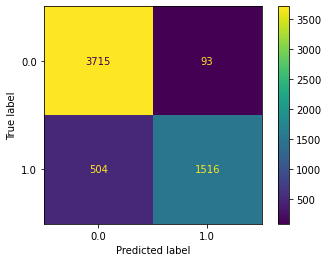

In [220]:
# Для наглядности построим график confusion matrix.
plot_confusion_matrix(vc,X_test,y_test);

In [221]:
# Создадим набор из списка моделей и их показателей accuracy score. Отсортируем значения при помощи .sort_values и представим в 
# виде таблицы
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'XgBoost', 'Cat Boost', 'Extra Trees Classifier', 'LGBM', 'Voting Classifier'
               , 'Ridge Classifier',"Bagging Classifier","SGDC","Bernoulli NB","Support Vector Classifier"],
    'Score' : [acc_lr, acc_KNC, acc_DTC, acc_RFC, acc_ABC, acc_GBC, acc_XGBC, acc_CBC, acc_ETC, acc_LGBMC, acc_vc, acc_RC,acc_BC,acc_SGDC,acc_BNB,acc_SVC]
})
models.sort_values(by = 'Score', ascending = False)

Model     Score
9                           LGBM  0.905456
6                        XgBoost  0.905113
2       Decision Tree Classifier  0.904255
7                      Cat Boost  0.903569
13                          SGDC  0.902025
11              Ridge Classifier  0.898936
3       Random Forest Classifier  0.898421
4           Ada Boost Classifier  0.897735
10             Voting Classifier  0.897563
0            Logistic Regression  0.896534
15     Support Vector Classifier  0.893789
1                            KNN  0.893274
5   Gradient Boosting Classifier  0.887612
8         Extra Trees Classifier  0.886067
14                  Bernoulli NB  0.864447
12            Bagging Classifier  0.761153

#### Wee see we got good models here. But i personally would go for the SGDC a 90 scoree with a magnificent handling of the imbalance (see recall scores). We could even try to tune it a bit more. As i said, my computer is not a turtle but maybe a cousing of it hehe. So in a good machine you could train the models much more.

In [222]:
# Построим гистограмму для наглядного сравнения качества моделей по метрике accuracy score
import plotly.express as px
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', title = 'Models Comparison')



### Thats all, hope you liked. Any feedback is super welcomee.